# COMP-7950 - Advanced Machine Learning - Project

## Instructions

| Date set     | Hand-in date |
|------------------|-----------------------------------|
|20th October 2021  | **12th December 2021** |



# Student: FAHIM FAISAL <br> ID:  007931658 

Your submission should consist of your Jupyter notebook showing what you did (including technical descriptions of the implemented algorithms), what was the result of the implementation and what you can conclude from the experiments. Each submission will be assessed on the following criteria:

* Does it record what was done including the details of the implemented algorithms?
* Does it permit the results to be reproduced?
* How does the work relate to the theoretical foundations discussed in lectures?
* Is it well presented?

Use markdown to explain what you are doing (including equations for models and algorithms), what the results mean, how they relate to the theory, etc. For learning how to use jupyter notebooks, you might refer to this guide: https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook

Do not delete this preamble.

### Submitting the notebooks

Only an electronic submission is required. Submit your notebook (the .ipynb file) via e-mail to [lorenzo.livi@umanitoba.ca](mailto:lorenzo.livi@umanitoba.ca).

<div class="alert alert-warning">
Although you will undoubtedly work collaboratively, these are individual exercises. The comments and code you write should be about the results you obtained, and your attention is drawn to the University guidelines on collaboration and plagiarism. 

## Project specification

- **First part of the project**

Implement a standard echo state network (ESN) model. Do not include feedback from the output in the ESN state-update equation and do not use leaky-integrator neurons. Implement training of the ESN read-out weights by means of the regularized least-square method; see page 21/30 in lecture notes. Perform some simulations by considering a _k_ step ahead forecasting task (evaluate several values of *k*, the forecasting horizon) on the "2sine" and "lorentz" time series (that are provided in the archive together with this notebook) and comments on the experimental results. Note that, in order to train ESNs, you will have to create a dataset of input-output pairs starting from the raw time series. Assume outputs to be unidimensional; on the other hand, you may choose the dimension of inputs, i.e. inputs to the ESN can be multidimensional. Fine tune all relevant hyper-parameters that significantly affect the model performance and provide comments on their setting.
    
- **Second part of the project**

Reconstruct and visualize the Lorentz attractor by using states of the ESN implemented in the first part of the project. Feed the implemented ESN model with the time series data in the "lorentz" file and analyze the related sequence of states generated by the ESN model. In order to visualize the *attractor* learned by the ESN, you will have to implement Principal Component Analysis (PCA) by using only numpy functions. Please **do not** use any external PCA implementations, such as the one in scikit-learn. **You may consider a PCA implementation from external libraries (e.g. scikit-learn) only for validating your own implementation of PCA**.
You will notice that the shape of the reconstructed attractor will change depending on (1) the specific setting of the (relevant) ESN hyper-parameters and (2) the number of neurons in the recurrent layer. You will have to find an hyper-parameter setting and ESN model setup that give a *good* reconstruction. Moreover, you will have to comment on whether such a reconstruction is stable under small perturbations of the hyper-parameters and random initialization of the developed ESN model.
A *good* reconstruction of the Lorentz attractor should look approximately like the one in the following figure:

![Lorentz.jpg](attachment:Lorentz.jpg)

What you will obtain is most likely a somewhat distorted version of it, like shown in the following figure:
![pca_lorentz_distorted.png](attachment:pca_lorentz_distorted.png)
However, try your best and what is really important for your reconstruction is the presence of the two wings of the Lorentz attractor.

As an extra analysis, you should use some already implemented non-linear dimensionality reduction / manifold learning method from scikit-learn and see if the corresponding 2D/3D visualization of the reconstruction is better than the one provided by PCA.

## Your project starts from here!

In [1]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler as sc
# make sure plots are displayed correctly
%matplotlib inline

In [2]:
from numpy import *
from matplotlib.pyplot import *
import scipy.linalg
import matplotlib.pyplot as plt

Implement a standard echo state network (ESN) model. Do not include feedback from the output in the ESN state-update equation and do not use leaky-integrator neurons. Implement training of the ESN read-out weights by means of the regularized least-square method; see page 21/30 in lecture notes. 

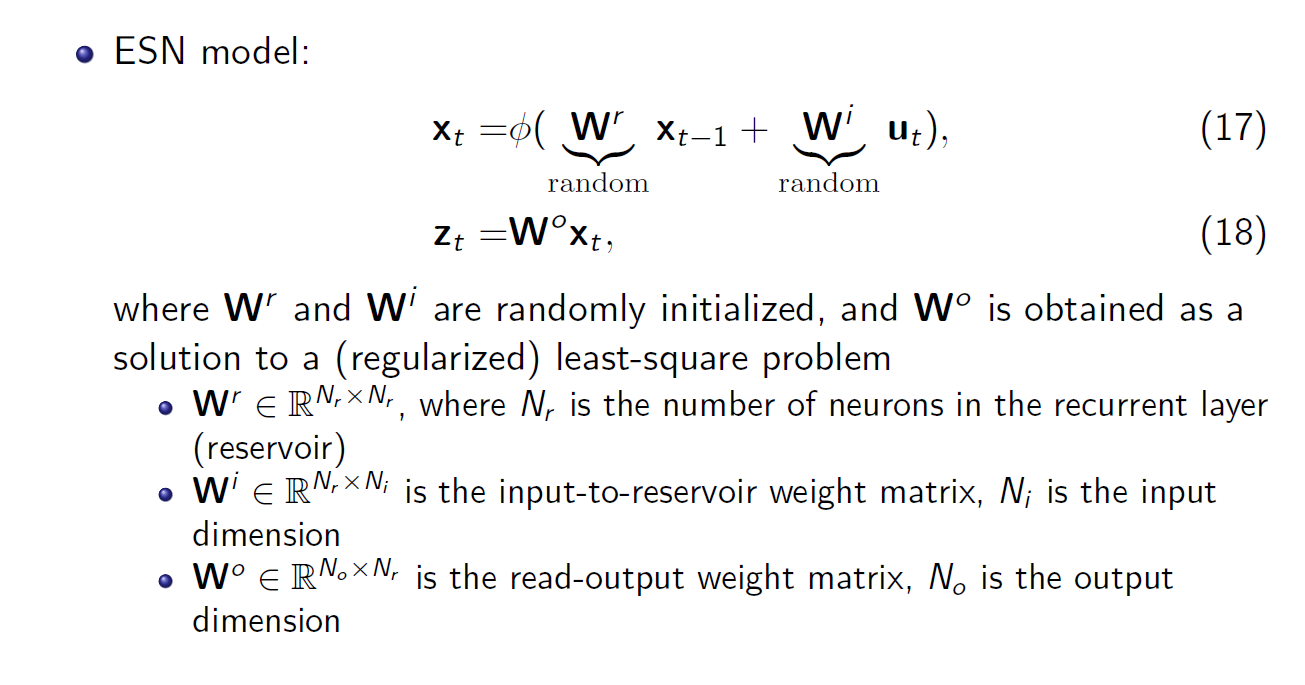

Algorithm followed:

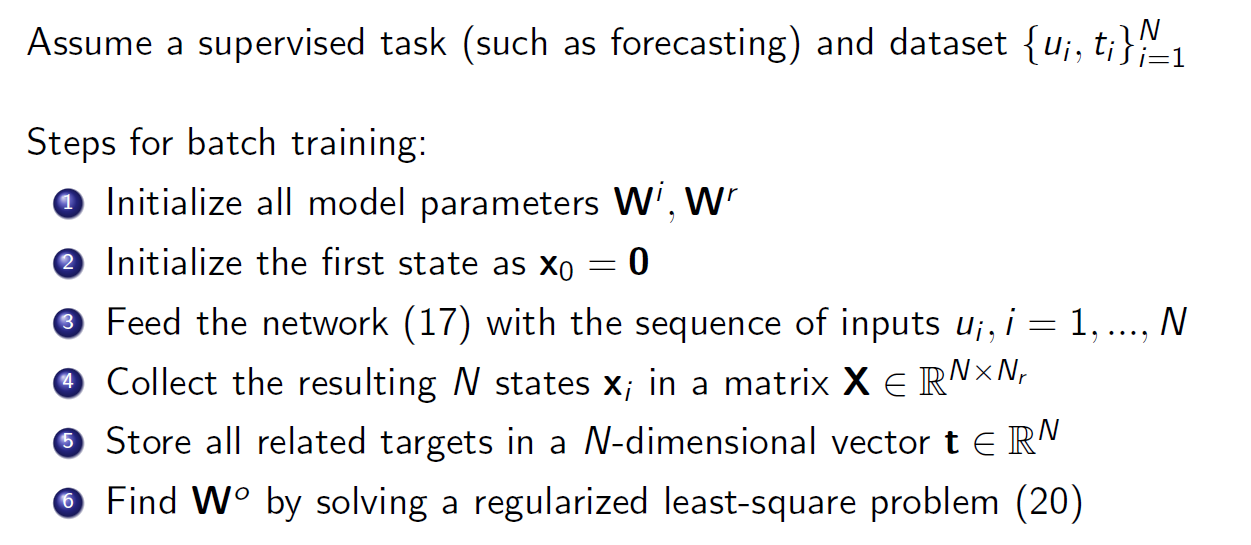

#ESN algorithm 


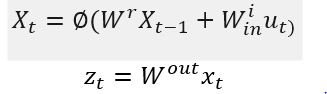

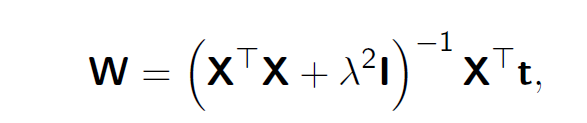



### 1.   Initialize the first state as x0=0
#### (initialize all parameter models Win,Wr , they are independently drawn from a uniform distribution <br> Wr determines the dynamics of the network so it requires more attention.Divide Wr by spectral radius and multiply by desired spectral radius given .Delete the fraction of connections given by using given sparsity value which helps to generate a non-boring dynamics.
### 2.   Feed the network with the sequence of inputs , ui, i=1...N
### 3. Collect resulting N states in a matrix X using state update equation <br>
#### (Inject bias in the weight by stacking 1s with weights )
### 4. Store all actual targets in an N dimensional vector y1
### 5. Find Wo by solving a regularized least square regression in closed form.<br> 
#### ( getting weights in closed form .regularization and lambda helps to control the magnitude of the weight vector W.It not only improves numerical stability, but also the reduced magnitude of entries in Wo, it becomes less sensitivity to noise and overfitting
)
### 6. predict y_hat using a linear function with weight Wo and calculate loss using normalized root mean squared error 
### 7. NRMSE= np.sqrt(||y1-y_hat||**2)/var(y1) to assess performance 

### **This model is really sensitive to careful initialization. Even changing the seed value and scale in initialized weighst may lead to a degenerate solutuion. So, it needs careful hyperparameter tuning**



# Code details


### initialize all parameter models Win,Wr and use scale
### Win for input
    Win = random.rand(reservoir_Size,1+input_Size) - scale
### Wr for state
    Wr = random.rand(reservoir_Size,reservoir_Size) - scale


### normalizing and setting spectral radius (correct, slow)
### Maximum singular value and spectral radius
rhoW = max(abs(linalg.eig(Wr)[0]))


#### divide by spectral radius and multiply by desired spectral radius given 
    Wr *= spec / rhoW
    
#### introducing sparsity in Wr
#### delete the fraction of connections given by (self.sparsity): as sparse connection is needed for better dynamics
    Wr[np.random.rand(reservoir_Size, reservoir_Size)>sparsity] = 0

#### allocated memory for the design (collected states) matrix
    X = zeros((1+reservoir_Size, training_size))

#### set the corresponding target matrix directly
    Yt = [y1[0: training_size]]
    print("output Y shape ",len(Yt))

#### run the reservoir with the data and collect X
    x = zeros((reservoir_Size,1))
    states=zeros((training_size+test_size+2,reservoir_Size))
    for t in range(training_size):
        u = data[t].reshape(-1,1)
#### drive reservoir with time series
        x = tanh( np.dot( Win, vstack((1,u)) ) + np.dot( Wr, x ) )


#### collect all the states in X
        X[:,t] = vstack((1,x))[:,0]

#### train the output by ridge regression
#### no epochs just one shot



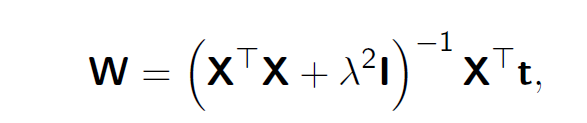

    
#### getting weights in closed form 
#### regularization and lambda helps to control the magnitude of the weight vector Wout

    Wout = np.dot( dot(Yt,X_T), linalg.inv( np.dot(X,X_T) + lambdas*eye(1+reservoir_Size) ) )
    

#### y_hat is for storing prediction 
    Y_hat = zeros(( output_Size,training_size+test_size))
#### run the trained ESN with training data
    Y = zeros((output_Size,training_size))
    
    u = data[0].reshape(-1,1) # starting point

    for t in range(training_size):
#### update internal activations\pre-activation
        
#### inject bias by stacking 1s with weights
        x = tanh( np.dot( Win, vstack((1,u)) ) + np.dot( Wr, x ) )
![1.png](attachment:1.png)



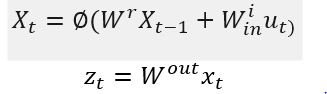

#### storing states,X for later visualization 
        states[t,:]=np.squeeze(x)
        
#### calculate outputs
        y = np.dot( Wout, vstack((1,x)) )
        # save the outputs
        Y[:,t] = y
#### here y_hat is Zt (from equation)
        Y_hat[:,t]=y

        # get new input
        u = data[t+1].reshape(-1,1)
#### compute RMSE for the first errorLen time steps
    rmse_train = (sum( square( y1[0: training_size] - 
        Y[:,0:training_size] ) ) / training_size)**(1/2.0)
        
  
    nrmse_train = rmse_train / (max(y1) - min(y1))

#### simsilarly run testing on test data which was not used during training
#### return  1) nrmse_train, 2) nrmse_test, 3) Y_hat (predictions),4) states


In [3]:

def train_ESN(data, y1, training_size,test_size, input_Size, output_Size, reservoir_Size, lambdas, spec, scale):
    sparsity = 0.8
    random.seed(42)
    #1) initialize all parameter models Win,Wr
    Win = random.rand(reservoir_Size,1+input_Size) - scale

    Wr = random.rand(reservoir_Size,reservoir_Size) - scale
    print("W input shape ",Win.shape)
    print("W_reservoir shape ",Wr.shape)
    

    # normalizing and setting spectral radius (correct, slow)
    #Maximum singular value and spectral radius

    rhoW = max(abs(linalg.eig(Wr)[0]))
    #print("Spectral Radius: ", rhoW)
    #directly impacts on the "dynamic"
    #divide by spectral radius and multiply by desired spectral radius given 
    #Wr=spec(a)*Wr/rhow
    #a/spec a value around 1
    Wr *= spec / rhoW
    
    #introducing sparsity in Wr
    # delete the fraction of connections given by (self.sparsity):
    Wr[np.random.rand(reservoir_Size, reservoir_Size)>sparsity] = 0
    #stable dynamics so no need to train
    #another way is to use gaussian distribution with param g

    # allocated memory for the design (collected states) matrix
    X = zeros((1+reservoir_Size, training_size))
    #print("dataset X ",X.shape)
    print("dataset shape ",data.shape)
    # set the corresponding target matrix directly
    Yt = [y1[0: training_size]]
    print("output Y shape ",len(Yt))

    # run the reservoir with the data and collect X
    x = zeros((reservoir_Size,1))
    states=zeros((training_size+test_size+2,reservoir_Size))
    for t in range(training_size):
        u = data[t].reshape(-1,1)
        #drive reservoir with time series
        x = tanh( np.dot( Win, vstack((1,u)) ) + np.dot( Wr, x ) )
        
          #U  value -0.156058 x value==== (300, 1) Vstack elem shape  (302, 1) 
          #(1, 302)=>Wour

        #collect all the states in X
        X[:,t] = vstack((1,x))[:,0]

    # train the output by ridge regression
    #no epochs just one shot
    #very fast
    X_T = X.T
    
    #getting weights in closed form 
    #regularization and lambda helps to control the magnitude of the weight vector W
    Wout = np.dot( dot(Yt,X_T), linalg.inv( np.dot(X,X_T) + lambdas*eye(1+reservoir_Size) ) )
    print(Wout.shape)

    # average absolute size of learned output weights
    avgout = sum(abs(Wout))/(len(Wout[0]) *  output_Size)
    #print("Average size output weights: ", avgout)

    Y_hat = zeros(( output_Size,training_size+test_size))
    # run the trained ESN with training data
    Y = zeros((output_Size,training_size))
    u = data[0].reshape(-1,1) # starting point

    for t in range(training_size):
        # update internal activations\pre-activation
        
        #inject bias by stacking 1s with weights
        x = tanh( np.dot( Win, vstack((1,u)) ) + np.dot( Wr, x ) )
        states[t,:]=np.squeeze(x)
        # calculate outputs
        y = np.dot( Wout, vstack((1,x)) )
        # save the outputs
        Y[:,t] = y
        Y_hat[:,t]=y

        # get new input
        u = data[t+1].reshape(-1,1)
        if(t%5000==0):
          #print("U  value",u,"x value====snall x/state shape",x.shape,"Vstack (1,input,state) elem shape ",(vstack((1,u,x))).shape,"|||| beofore ",y1[t],"and after predicted ",y,"\n")
          #print("at ",t," step and value of X ",data[t-1][0],"and corresponding value of y_hat",y," and actual value of y",y1[t])
          print("at ",t," step corresponding value of y_hat",y," and actual value of y",y1[t])



    # compute RMSE for the first errorLen time steps
    rmse_train = (sum( square( y1[0: training_size] - 
        Y[:,0:training_size] ) ) / training_size)**(1/2.0)
    #print('RMSE = \t' + str( rmse1 ))
    nrmse_train = rmse_train / (max(y1) - min(y1))
    #print('train NRMSE = ', str(nrmse1) )


 #-------------------------------------------------------------------TEST-------------------------------------
    # run the trained ESN with test data
    Y = zeros(( output_Size,test_size))
    u = data[training_size].reshape(-1,1) # starting point
    for t in range(test_size):
        # update internal activations / pre-activation
        x = tanh( np.dot( Win, vstack((1,u)) ) + np.dot( Wr, x ) )
        states[training_size+t,:]=np.squeeze(x)
       # calculate outputs
        y = dot( Wout, vstack((1,x)) ) # calculate outputs
        #print(y)
        # save the outputs
        Y[:,t] = y
        #print(Y[:,t])
        Y_hat[:,training_size+t]=y
        # get new input
        u = data[training_size+t+1].reshape(-1,1)

        # if(t%5000==0):
        #   #print("U  value",u,"x value====snall x/state shape",x.shape,"Vstack (1,input,state) elem shape ",(vstack((1,u,x))).shape,"|||| beofore ",y1[t],"and after predicted ",y,"\n")
        #   print("at ",t," step and value of X ",data[t-1][0] ,"and corresponding value of y_hat",y," and actual value of y",y1[t])

    
    # compute RMSE for the first errorLen time steps
    errorLen = test_size
    rmse_test = (sum( square( y1[training_size:training_size+errorLen] - 
        Y[:,0:errorLen] ) ) / errorLen)**(1/2.0)
    #print('RMSE = \t' + str( rmse3 ))
    nrmse_test = rmse_test / (max(y1) - min(y1))
    #print('test NRMSE  =  ' + str( nrmse3 ))
    print("train loss",nrmse_train," test loss",nrmse_test,"\n=============done===============")
    
 
  


    return nrmse_train, nrmse_test, Y_hat,states

# DATASET loading and constructing

In [4]:
import pandas as pd
list_lorentz=pd.read_csv('lorentz.txt',sep=',',header=None)[0].tolist()


import pandas as pd
list_sine=pd.read_csv('2sin.txt',sep=',',header=None)[0].tolist()

 Note that, in order to train ESNs, you will have to create a dataset of input-output pairs starting from the raw time series. Assume outputs to be unidimensional; on the other hand, you may choose the dimension of inputs, i.e. inputs to the ESN can be multidimensional. 

 ## **prepare data** gets timeseries data and outputs X and Y with k step difference. <br>
 ## n_features is the dimension and step difference in input X matrix

## Method for creating input-output pairs from data with different input shape. Method for creating input-output pairs with k step gap  and multidimensional input from data

In [5]:
def prepare_data(timeseries_data, n_features):
    X, y =[],[]
    for i in range(len(timeseries_data)):
        # find the end of this pattern
        end_ix = i + n_features
        # check if we are beyond the sequence
        if end_ix > len(timeseries_data)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)
 
import numpy as np



Method for creating input-output pairs with k stepl gap  and multidimensional input from data

# Prepare input/output list

In [6]:

n_features=3
X, y = prepare_data(list_lorentz, n_features)
print(X[0:5,:],y[0:5])
X.shape

[[-0.156058 -0.071057  0.00456 ]
 [-0.071057  0.00456   0.072342]
 [ 0.00456   0.072342  0.133683]
 [ 0.072342  0.133683  0.189835]
 [ 0.133683  0.189835  0.241921]] [0.072342 0.133683 0.189835 0.241921 0.290958]


(16381, 3)

# Fine tune all relevant hyper-parameters that significantly affect the model performance and provide comments on their setting.

# SCALE
# After trying different values for scale, we got that **scale=0.46** gives the best test result 

## scale is used for scaling during the initialization of weight matrices and we know a careful initialization is important for perfect model generation

## FOR INPUT SIZE OF 3 


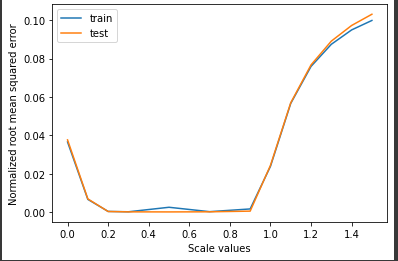

## FOR INPUT SIZE OF 1

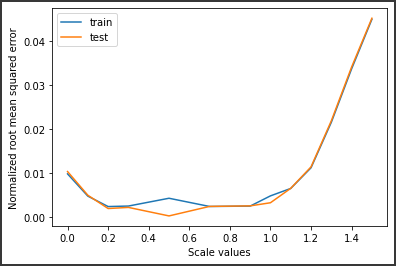

[[-0.156058]
 [-0.071057]
 [ 0.00456 ]
 [ 0.072342]
 [ 0.133683]] [-0.071057  0.00456   0.072342  0.133683  0.189835]
W input shape  (300, 2)
W_reservoir shape  (300, 300)
dataset shape  (16383, 1)
output Y shape  1
(1, 301)
at  0  step corresponding value of y_hat [[-0.2062029]]  and actual value of y -0.071057
at  5000  step corresponding value of y_hat [[-13.53980154]]  and actual value of y -13.873947
at  10000  step corresponding value of y_hat [[3.95472838]]  and actual value of y 4.305944
train loss 0.009862651633781288  test loss 0.010394151274322175 
=============done===============
W input shape  (300, 2)
W_reservoir shape  (300, 300)
dataset shape  (16383, 1)
output Y shape  1
(1, 301)
at  0  step corresponding value of y_hat [[-3.720167]]  and actual value of y -0.071057
at  5000  step corresponding value of y_hat [[-13.73992656]]  and actual value of y -13.873947
at  10000  step corresponding value of y_hat [[4.06904286]]  and actual value of y 4.305944
train loss 0.004803

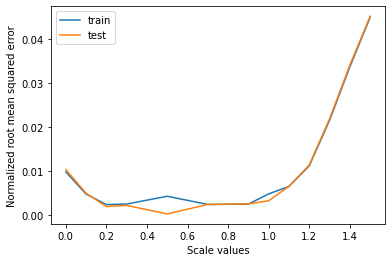

In [7]:
#SCALE

n_features=1
X, y = prepare_data(list_lorentz, n_features)
print(X[0:5,:],y[0:5])
X.shape
# generate ESN reservoir
trainLen=14000
testLen=2000
inputSize = 1
outputSize = 1
resSize = 300

reg = 1e-2  # regularization coefficient
spec = 1
#scale = 0.7
trainmean = list()
testmean = list()
scale_tries = [ 0, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5]
for r in scale_tries:
    traineval = list()
    testeval = list()
    avgout = list()
    geneval = list()
    n1, n2 ,yt1,xs1 = train_ESN(X, y, trainLen, testLen, inputSize, outputSize, resSize, reg, spec, r)
    traineval=n1
    testeval=n2
    #geneval.append(n3)
    trainmean.append((traineval))
    testmean.append((testeval))
plt.plot(scale_tries, trainmean)
plt.plot(scale_tries, testmean)
plt.xlabel("Scale values")
plt.ylabel("Normalized root mean squared error")
#plt.plot(tries, genmean)
plt.legend(['train', 'test'])
plt.show()

#plt.plot(tries, avgoutmean)
#plt.show()


# STATE SPACE
## After trying different values for state space/reservoir , we got that **state size=1600**  gives the best test result

## no of neurons  (I have to learn how to couple the oscillators created by state space to map direclty to deisred output so to capture complex pattern they need to be big enough) 
## After trying different values for state space/reservoir , we got that **state size=1600**  gives the best test result

### FOR INPUT dimension OF 3 and k=3 state size vs ERROR 



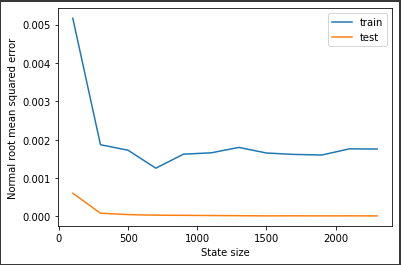

### FOR INPUT SIZE (dimension) OF 1 and k=1 STATE size vs ERROR

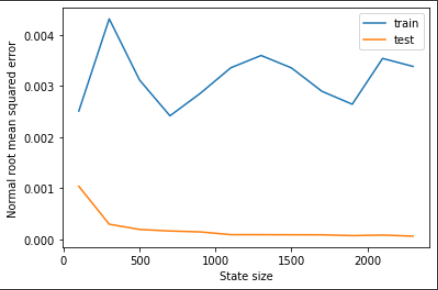

W input shape  (100, 2)
W_reservoir shape  (100, 100)
dataset shape  (16383, 1)
output Y shape  1
(1, 101)
at  0  step corresponding value of y_hat [[-1.71785314]]  and actual value of y -0.071057
at  5000  step corresponding value of y_hat [[-13.87217899]]  and actual value of y -13.873947
at  10000  step corresponding value of y_hat [[4.27427355]]  and actual value of y 4.305944
train loss 0.0025127840780909596  test loss 0.0010397917267151453 
=============done===============
0.0025127840780909596 0.0010397917267151453 %
W input shape  (300, 2)
W_reservoir shape  (300, 300)
dataset shape  (16383, 1)
output Y shape  1
(1, 301)
at  0  step corresponding value of y_hat [[-15.23136129]]  and actual value of y -0.071057
at  5000  step corresponding value of y_hat [[-13.877967]]  and actual value of y -13.873947
at  10000  step corresponding value of y_hat [[4.30628129]]  and actual value of y 4.305944
train loss 0.004317261255842668  test loss 0.0002976050018641012 
=============done====

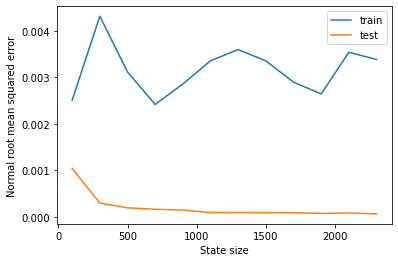

In [8]:
n_features=1
X, y = prepare_data(list_lorentz, n_features)
# generate ESN reservoir
inputSize = 1
#inSize=1
outputSize = 1
#resSize = 50

reg = 1e-2  # regularization coefficient
spec = 1
scale = 0.5
#scale=0.46
trainmean = list()
testmean = list()
testmean = list()
avgoutmean = list()
state_tries = [100, 300, 500, 700, 900,1100,1300,1500,1700,1900,2100,2300]
for r in state_tries:
    #traineval = list()
    #testeval = list()
    #avgout = list()
    n1, n2, yt1,xs1 = train_ESN(X,y,trainLen, testLen, inputSize, outputSize, r, reg, spec, scale)
    traineval=n1
    testeval=n2
    print(n1,n2,"%")
    #geneval.append(n3)
    trainmean.append(traineval)
    testmean.append(testeval)
plt.plot(state_tries, trainmean)
plt.plot(state_tries, testmean)
plt.xlabel("State size")
plt.ylabel("Normal root mean squared error")
plt.legend(['train', 'test'])
plt.show()

# Lamda 
## Lambda is used for regularization in least square solution (It helps to get numerical stability and helps to keep the magnitude of Wout small- this ensures less sensitivity to noise and less overfiting)


## After trying different values lambda (which is used as a regularization hyperparameter for least square regression) , we got that **lambda=10e-2** gives the best test result

### FOR No of features 3 (for input dimension of 3 and k=3)

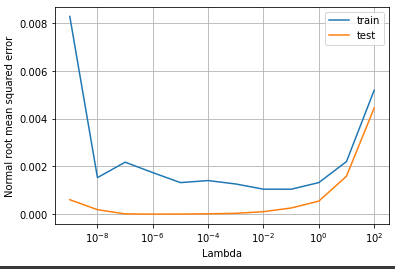

### FOR No of features 1 (for input dimension of 1 and k=1)

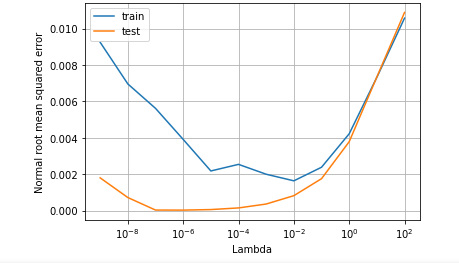

**Regression Regularization param lambda**

W input shape  (300, 2)
W_reservoir shape  (300, 300)
dataset shape  (16383, 1)
output Y shape  1
(1, 301)
at  0  step corresponding value of y_hat [[-5.71340171]]  and actual value of y -0.071057
at  5000  step corresponding value of y_hat [[-13.42683669]]  and actual value of y -13.873947
at  10000  step corresponding value of y_hat [[4.1416129]]  and actual value of y 4.305944
train loss 0.010580733465181773  test loss 0.010893414215904108 
=============done===============
W input shape  (300, 2)
W_reservoir shape  (300, 300)
dataset shape  (16383, 1)
output Y shape  1
(1, 301)
at  0  step corresponding value of y_hat [[-9.20767129]]  and actual value of y -0.071057
at  5000  step corresponding value of y_hat [[-13.53284118]]  and actual value of y -13.873947
at  10000  step corresponding value of y_hat [[4.35305093]]  and actual value of y 4.305944
train loss 0.007327832727293622  test loss 0.007345968736451076 
=============done===============
W input shape  (300, 2)
W_reservoir s

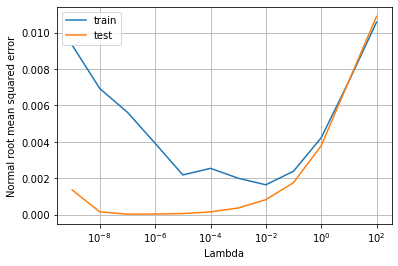

In [9]:
#Regression Regularization param lambda
n_features=1
X, y = prepare_data(list_lorentz, n_features)
trainLen=14000
testLen=2000
inputSize = 1
outputSize = 1
resSize = 300


#reg = 1e-4  # regularization coefficient
spec = 1
scale = 0.46
trainmean = list()
testmean = list()
avgoutmean = list()
tries =  [100, 10, 1, 1e-1, 1e-2, 1e-3, 1e-4,1e-5,1e-6,1e-7, 1e-8, 1e-9]
for r in tries:
    n1, n2,yt,xs = train_ESN(X,y, trainLen, testLen, inputSize, outputSize, resSize, r, spec, scale)
    traineval=(n1)
    testeval=(n2)
    #avgout.append(avg)
    trainmean.append(mean(traineval))
    testmean.append(mean(testeval))
    #avgoutmean.append(mean(avgout))
plt.semilogx(tries, trainmean)
plt.semilogx(tries, testmean)
plt.grid()
plt.legend(['train', 'test'])
plt.xlabel("Lambda")
plt.ylabel("Normal root mean squared error")
plt.show()

# Spectral radius changing parameter spec

## This value is assigned to get the desired spectral radius

# After trying different values for spectral radius, we got that **radius=1** gives the best test result

### FOR No of features 1 (for input dimension of 1 and k=1)

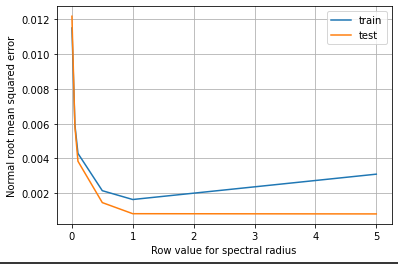


### FOR No of features 3 (for input dimension of 3 and k=3)

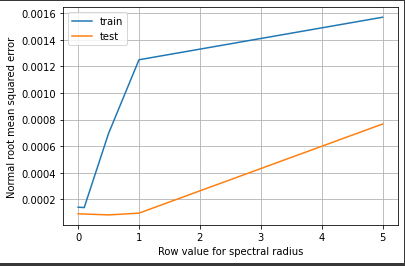

W input shape  (300, 2)
W_reservoir shape  (300, 300)
dataset shape  (16383, 1)
output Y shape  1
(1, 301)
at  0  step corresponding value of y_hat [[-0.30818514]]  and actual value of y -0.071057
at  5000  step corresponding value of y_hat [[-13.39278511]]  and actual value of y -13.873947
at  10000  step corresponding value of y_hat [[3.9220241]]  and actual value of y 4.305944
train loss 0.011502056216619204  test loss 0.012176067901367082 
=============done===============
W input shape  (300, 2)
W_reservoir shape  (300, 300)
dataset shape  (16383, 1)
output Y shape  1
(1, 301)
at  0  step corresponding value of y_hat [[-9.20329812]]  and actual value of y -0.071057
at  5000  step corresponding value of y_hat [[-13.53965965]]  and actual value of y -13.873947
at  10000  step corresponding value of y_hat [[4.30819543]]  and actual value of y 4.305944
train loss 0.005930960720856715  test loss 0.005844693624805484 
=============done===============
W input shape  (300, 2)
W_reservoir s

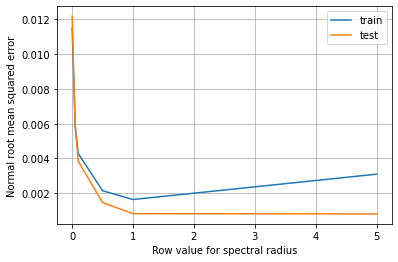

In [10]:
n_features=1
X, y = prepare_data(list_lorentz, n_features)
trainLen=14000
testLen=2000
inputSize = 1
outputSize = 1
resSize = 300
reg = 1e-2 

#reg = 1e-4  # regularization coefficient
#spec = 1
scale = 0.46
trainmean = list()
testmean = list()
avgoutmean = list()
spectral_tries = [0.001, 0.05, 0.1, 0.5, 1, 5]
for r in spectral_tries:
    n1, n2,yt,xs = train_ESN(X,y, trainLen, testLen, inputSize, outputSize, resSize, reg, r, scale)
    traineval=(n1)
    testeval=(n2)
    #avgout.append(avg)
    trainmean.append(mean(traineval))
    testmean.append(mean(testeval))
    #avgoutmean.append(mean(avgout))
plt.plot(spectral_tries, trainmean)
plt.plot(spectral_tries, testmean)
plt.grid()
plt.legend(['train', 'test'])
plt.xlabel("Row value for spectral radius")
plt.ylabel("Normal root mean squared error")
plt.show()

## Sample considered =16,0000 ,train =14000 (87.5%) , test=2000
##### Regression Regularization param lambda 10^-2, reservoir size 1600 , spec 1 , scale=0.46**

# to run code, n_feauters should be equal to inputSize

In [11]:

n_features=3
#n_steps=1
#n_steps=6
#
X, y = prepare_data(list_lorentz, n_features)
print(X[0:5,:],y[0:5])
X.shape

[[-0.156058 -0.071057  0.00456 ]
 [-0.071057  0.00456   0.072342]
 [ 0.00456   0.072342  0.133683]
 [ 0.072342  0.133683  0.189835]
 [ 0.133683  0.189835  0.241921]] [0.072342 0.133683 0.189835 0.241921 0.290958]


(16381, 3)

# After hyperparameter tuning, scale=0.46 , reservoir=1600, lambda=10^-2, spectral radius =1 , input dimension =3 


#### *  Train: 	 mean: 	 5.597719529911446e-05
#### *  Test:  	 mean: 	 3.417817144257995e-05
(16002, 1600)


# After hyperparameter tuning, scale=0.46 , reservoir=1600, lambda=10^-2, spectral radius =1 ,input dimension =10 

*  train mean 0.00014243630061261305 
*  Test: mean 3.75514249588027e-05 

**After hyper parameter tuning**

In [12]:

n_features=3
inputSize=3

#
X, y = prepare_data(list_lorentz, n_features)





trainLen=14000

testLen=2000

# generate ESN reservoir


inputSize=3
#inSize = 6
outputSize = 1


# 3 insize
resSize = 1600




reg = 1e-2


spec=1
scale=0.46



yt=0

n1, n2, y_pred,xs = train_ESN(X, y, trainLen, testLen, inputSize, outputSize, resSize, reg, spec, scale)
#avg, n1, n2,yt,NEW_y = trainESN(X, y, initLen, trainLen, testLen, inSize, outSize, resSize, a, reg, spec, scale)
traineval=(n1)
testeval=(n2)
    #geneval.append(n3)
print("Train: \t mean: \t", (traineval))
print("Test:  \t mean: \t", (testeval))
#print("AVG:  \t mean: \t", mean(avg), "\t std: \t", std(avg))

lorentz_best_state=xs


W input shape  (1600, 4)
W_reservoir shape  (1600, 1600)
dataset shape  (16381, 3)
output Y shape  1
(1, 1601)
at  0  step corresponding value of y_hat [[0.09811798]]  and actual value of y 0.072342
at  5000  step corresponding value of y_hat [[-14.51206295]]  and actual value of y -14.508641
at  10000  step corresponding value of y_hat [[5.23169641]]  and actual value of y 5.231333
train loss 5.597719531881061e-05  test loss 3.417458331313281e-05 
=============done===============
Train: 	 mean: 	 5.597719531881061e-05
Test:  	 mean: 	 3.417458331313281e-05


## visualizing actual steps (blue) and y_hat generated using test samples (orange)¶

(1, 16000)


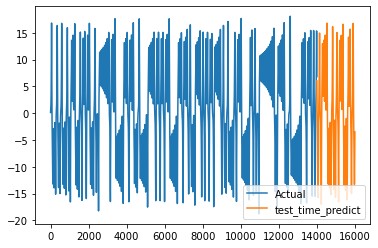

In [13]:
import matplotlib.pyplot as plt
print(y_pred.shape)

day_old=np.arange(1,14000)

day_pred=np.arange(14000,16000)

plt.plot(day_old,y[1:14000])
plt.plot(day_pred,np.squeeze(y_pred[:,14000:16000]))
plt.legend(['Actual', 'test_time_predict'])

# Actual y and y_hat plotted
## Gave 20 step gap between them else 2 plots get mergred together due to HIGH Accuracy


(1, 16000)


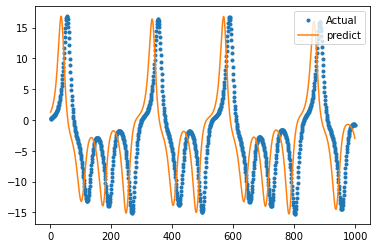

In [14]:
import matplotlib.pyplot as plt
print(y_pred.shape)

day_pred=np.arange(1,1000)

plt.plot(day_pred,y[1:1000],'.')
plt.plot(day_pred,np.squeeze(y_pred[:,20:1019]))
plt.legend(['Actual', 'predict'])


# target (y) plot (dotted blue) and predicted y_hat (orange)

(1, 16000)


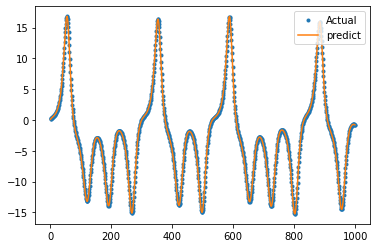

In [15]:
import matplotlib.pyplot as plt
print(y_pred.shape)

day_pred=np.arange(1,1000)

plt.plot(day_pred,y[1:1000],'.')
plt.plot(day_pred,np.squeeze(y_pred[:,1:1000]))
plt.legend(['Actual', 'predict'])

## printing y and y_hat 10 values predicted during training

In [16]:
print(y[trainLen:trainLen+10])
#for k step

print(y_pred[:,trainLen:trainLen+10])
#for k


#print(X[4890:5000])
# print(np.squeeze(NEW_y[:,0:10]))

[6.054403 5.326774 4.651398 4.029861 3.46215  2.947    2.482214 2.064926
 1.691834 1.359376]
[[6.05394125 5.32621925 4.65101238 4.02994462 3.46274609 2.94778374
  2.48272707 2.06498614 1.6915955  1.35897648]]


### we can observe the compared 10 values of y and y_hat are almost similar :
#### y 
[6.054403 5.326774 4.651398 4.029861 3.46215  2.947    2.482214 2.064926
 1.691834 1.359376]<br>
##### y_hat/predicted 
[[6.05394185 5.32621985 4.65101296 4.0299452  3.46274666 2.9477843
  2.48272762 2.06498668 1.69159602 1.35897696]]

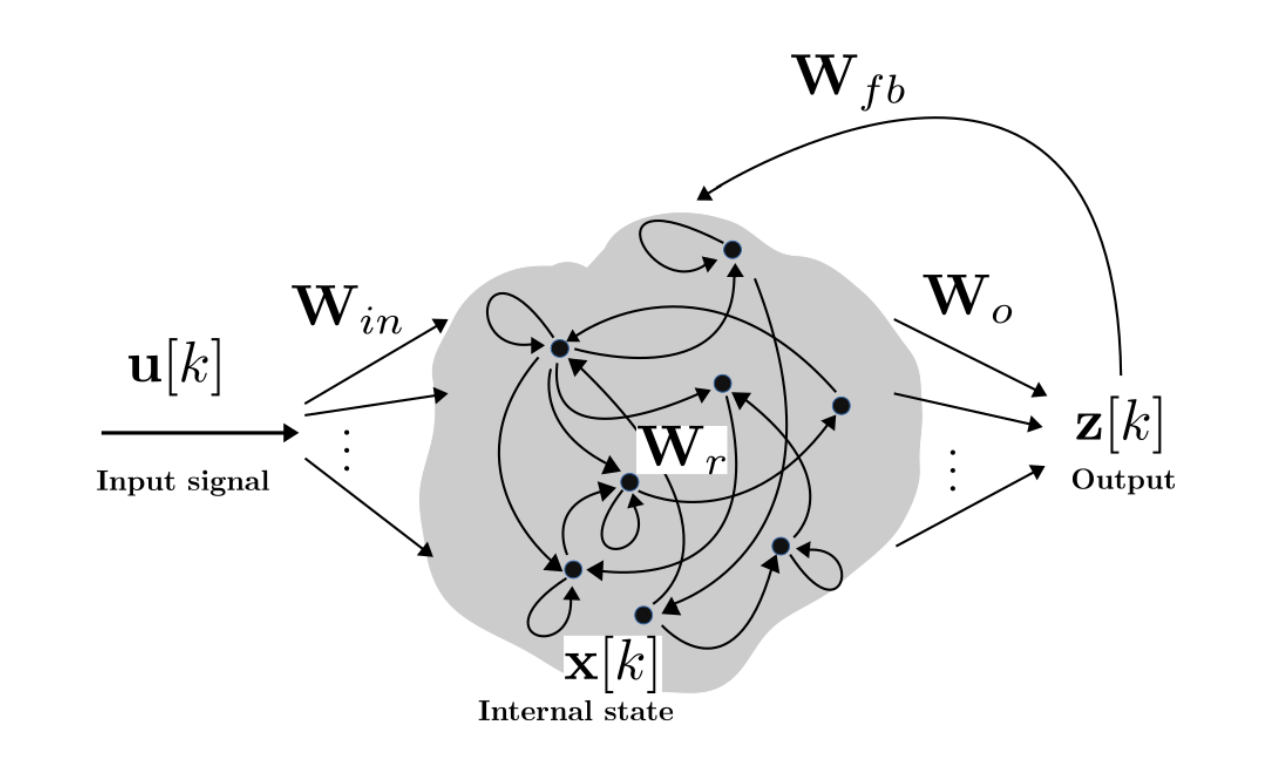

### Plotting some dimensions of state space  

(16002, 1600)


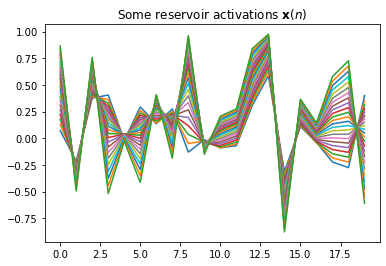

In [17]:
print(lorentz_best_state.shape)
figure(2).clear()
plot( lorentz_best_state[2:25,0:20].T )
title('Some reservoir activations $\mathbf{x}(n)$')
show()

# reservoir / state space plot of lorentz using bulit in PCA (VALIDATION only)

In [18]:

import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler as sc

pca = PCA(n_components=3)
lorentz_best_state_scaled = sc().fit_transform(lorentz_best_state)
projected=pca.fit_transform(lorentz_best_state_scaled)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)
print(projected.shape)

[0.90966892 0.03799373 0.03317778]
[4826.01651278  986.28655243  921.66010311]
(16002, 3)


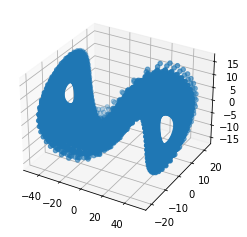

In [19]:
fig = plt.figure()
ax = plt.axes(projection='3d')
#use rank of PCA (most important to less imp - highest variation to lowest)


# Data for a three-dimensional line
xline = projected[:, 0]
zline =  projected[:, 1]
#2
yline =  projected[:, 2]
#1
#ax.plot3D(xline, yline, zline, 'gray')

ax.scatter3D(xline, yline, zline, cmap='Greens')


# Part 2: My PCA implementation

Reconstruct and visualize the Lorentz attractor by using states of the ESN implemented in the first part of the project. Feed the implemented ESN model with the time series data in the "lorentz" file and analyze the related sequence of states generated by the ESN model. In order to visualize the attractor learned by the ESN, you will have to implement Principal Component Analysis (PCA) by using only numpy functions. Please do not use any external PCA implementations, such as the one in scikit-learn. You may consider a PCA implementation from external libraries (e.g. scikit-learn) only for validating your own implementation of PCA. You will notice that the shape of the reconstructed attractor will change depending on (1) the specific setting of the (relevant) ESN hyper-parameters and (2) the number of neurons in the recurrent layer. You will have to find an hyper-parameter setting and ESN model setup that give a good reconstruction. Moreover, you will have to comment on whether such a reconstruction is stable under small perturbations of the hyper-parameters and random initialization of the developed ESN model. A good reconstruction of the Lorentz attractor should look approximately like the one in the given figure:

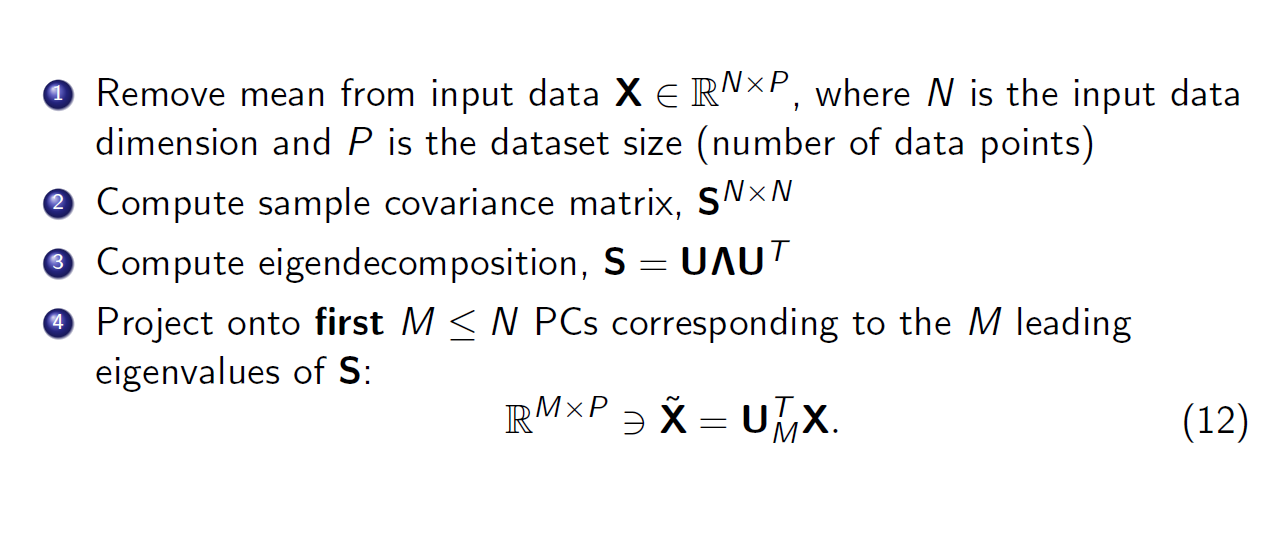



## 1.   Remove mean from input data 
## 2.   Compute covariance matrix using input data
## 3. Eignen decomposition of covariance matrix will give eigenvalues and eignenvector,U 
## 4. Sort U according to eignevalues in decreasing order as eigenvalue indicate the importance or variance of the features
## 5. Take k no of features to reduce dimensionality
## 6. project first k 

## Code details

class myPCA:
    def __init__(self,no_components):
        self.no_components=no_components
#### no of features is components 
#### U for eignevalues
        self.U=None
### need for subtracting the mean to scale the data for PCS
        self.mean=None
        
    def fit(self,X):
### 1) get the mean and scale the data
        self.mean=np.mean(X,axis=0)
        X_scaled=X-self.mean
        
### 2) calculate covariance matrix
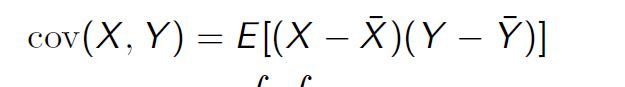
###  cov =sum(X-X_bar)(Y-Y_bar)

        S_cov=np.cov(X.T)
        
###  3) get eigevectors and eigenvalues via eigen decomposition
### Eigenvectors,U
![3.JPG](attachment:3.JPG)


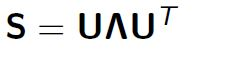
        eigenValues,U=np.linalg.eig(S_cov)

        
        
        
### 4) sort eigenvectors acccording to eigen values

      
        #[::-1] to reverse the list to get in decreasing order
        sorted_indices=np.argsort(eigenValues)[::-1]
        eigenValues=eigenValues[sorted_indices]
        U=U[sorted_indices]

### 5)keep components with highest variance and discard others
        self.U=U[0:self.no_components]

#### 6) project
    def transform(self,X):
        X_scaled=X-self.mean 



#### multiplied with transpose of U to get projected value
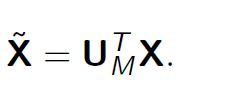
        projection=np.dot(X_scaled,self.U.T)
    
        projection=projection.astype(float)
        return projection

In [23]:
class myPCA:
    def __init__(self,no_components):
        self.no_components=no_components
        #components 
        self.U=None
        #need for subtracting the mean to scale the data for PCS
        self.mean=None
        
    def fit(self,X):
        #1) get the mean and scale the data
        self.mean=np.mean(X,axis=0)
        X_scaled=X-self.mean
        
        #2) calculate covariance matrix
        #cov =sum(X-X_bar)(Y-Y_bar)
        #numpy array 1 row 1 sample and 1 column 1 feature vector
        #according to np.cov, it works in the opposite way
        S_cov=np.cov(X.T)
        
        #3) get eigevectors and eigenvalues via eigen decomposition
        #Eigenvectors,U
        eigenValues,U=np.linalg.eig(S_cov)
        #v[:,i]
        
        
        
        #4) sort eigenvectors acccording to eigen values
        U=U.T
        #[::-1] to reverse the list to get in decreasing order
        sorted_indices=np.argsort(eigenValues)[::-1]
        eigenValues=eigenValues[sorted_indices]
        U=U[sorted_indices]

        #5)keep components with highest variance and discard others
        self.U=U[0:self.no_components]
    
    def accuracy(self,X):
        X_scaled=X-self.mean 
        X_projected=np.dot(X_scaled,self.U.T)
        #print(X_projected.shape)
        #(sample,no_comp)
        #print(self.U.shape)
        #(no_comp,no_original_features)
        X_reprojected=np.dot(X_projected,self.U)
        error=np.mean(np.sqrt((X_scaled-X_reprojected)**2))
        acc=(1-error)*100
        #print("PCA error",error,acc)
        return acc
    
    def transform(self,X):
        X_scaled=X-self.mean 
        #multiplied with transpose of U to get projected value
        projection=np.dot(X_scaled,self.U.T)
        # May get a small imaginary part in some eigenvalues due to numerical error. The imaginary parts can generally be ignored so used float casting
        projection=projection.astype(float)
        return projection

# Final my PCA visualization after hyperparameter tuning (3 input dimension)

#### scaled lorrentz_best_state before passing to my_PCA 
#### my_PCA_visualize(lorentz_best_state,3) takes state and dimension to plot as input
#### I wrote standardization formula manually
In Principal Component Analysis, features with high variances/wide ranges, get more weight than those with low variance, and 
consequently, they end up illegitimately dominating the First Principal Components (Components with maximum variance)
because the reason these features have high variances compared to the other ones is just because they were measured in different scales.Standardization can prevent this, by giving same wheightage to all features.

C:\Users\acer\AppData\Local\Temp/ipykernel_12124/1902551746.py:55: ComplexWarning: Casting complex values to real discards the imaginary part
  projection=projection.astype(float)
C:\Users\acer\AppData\Local\Temp/ipykernel_12124/1666429816.py:35: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


(16002, 3)
Shape of X: (16002, 1600)
Shape of transformed X: (16002, 3)


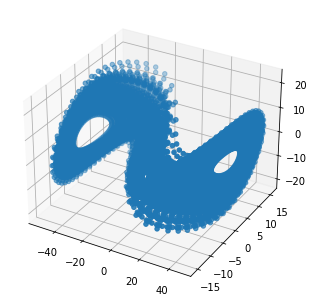

In [24]:

def my_PCA_visualize(state,no_features):
    my_pca = myPCA(no_features)
  #state_scaled = sc().fit_transform(state)
  #state_scaled = (state-np.mean(state))/np.std(state)
  #1- BEFORE PCA:
# In Principal Component Analysis, features with high variances/wide ranges, get more weight than those with low variance, and 
#consequently, they end up illegitimately dominating the First Principal Components (Components with maximum variance). I used the word “Illegitimately” here, 
#because the reason these features have high variances compared to the other ones is just because they were measured in different scales.
# Standardization can prevent this, by giving same wheightage to all features.
    state_scaled=(state-np.average(state,axis=0))/(np.std(state,axis=0))
    my_pca.fit(state_scaled)
    X_projected = my_pca.transform(state_scaled)
    print(X_projected.shape)

    print("Shape of X:", lorentz_best_state.shape)
    print("Shape of transformed X:", X_projected.shape)
  #print("Accuracy of my PCA",float(my_pca.accuracy(lorentz_best_state)))

    x1 = X_projected[:, 0]
    x2 = X_projected[:, 1]
    x3 = X_projected[:, 2]
    """
  plt.scatter(
      x1, x2, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
  )
    """
  #print(xs[:,0])
  #some of the complex values create problem so coverting them to float
    z1 = [float(i) for i in  X_projected[:, 0]]
    z2 = [float(i) for i in  X_projected[:,1]]
    z3 = [float(i) for i in  X_projected[:,2]]
    from mpl_toolkits.mplot3d import Axes3D
  # Figure out the correct P2
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(z1,z2,z3)
    plt.show()

  # plt.xlabel("Principal Component 1")
  # plt.ylabel("Principal Component 2")
  # plt.colorbar()
  #plt.show())
my_PCA_visualize(lorentz_best_state,3)

# FOR neurons=1600 (very close to actual lorentz attractor) (Final plot)

PCA reconsturcted state space of 3 with reservoir size 1600 dimentsion looks like the actual attractor.

After hyperparameter tuning, scale=0.46 , reservoir=1600, lambda=10^-2, spectral radius =1

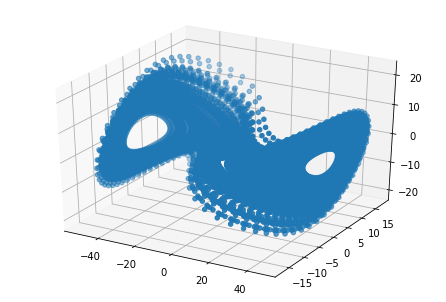

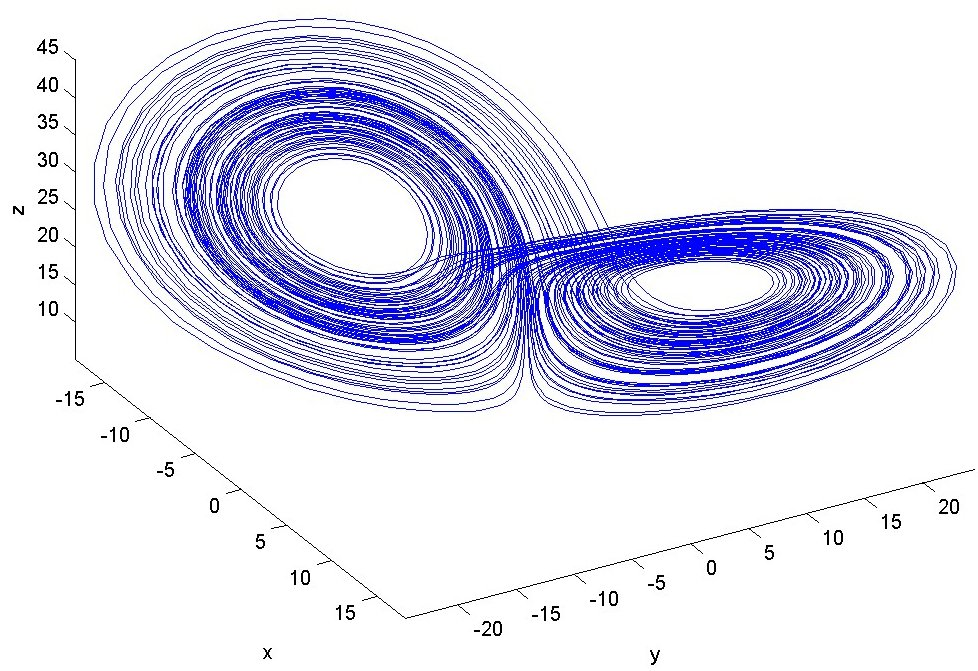

# we can see the generated state plot is sensitive to state size and hyperparameters
# FOR neurons=1900 (spectral radius=0)

### After hyperparameter tuning, scale=0.46 , reservoir=1600, lambda=10^-2, spectral radius =0 
PCA reconsturcted state space generated using input of 3 dimentsion with reservoir size 1900 looks like the actual attractor.PCA_1990.png

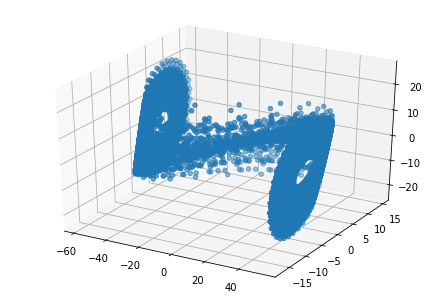

# FOR neurons=1600 (spectral radius =0) input dimension 7
#### After hyperparameter tuning, scale=0.46 , reservoir=1600, lambda=10^-2, spectral radius =0 

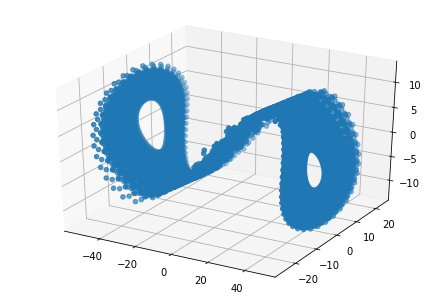

Perform some simulations by considering a k step ahead forecasting task (evaluate several values of k, the forecasting horizon) on the "2sine" and "lorentz" time series (that are provided in the archive together with this notebook) and comments on the experimental results. Note that, in order to train ESNs, you will have to create a dataset of input-output pairs starting from the raw time series. Assume outputs to be unidimensional; on the other hand, you may choose the dimension of inputs, i.e. inputs to the ESN can be multidimensional.

# Method for constructing uni dimensional k step interval data and trying for different values of K

In [25]:
#K step
X_train=[]
y_train=[]
k=3
for i in range((k-1),len(X)-(k-1)):
  X_train.append(X[i-(k-1)])
  y_train.append(y[i])

X_train,y_train=np.array(X_train),np.array(y_train)
print(X_train[0:5,:],y_train[0:5])

#K step forecasting with inputs
def k_step_forecasting_data(list_norm,n_features,k):
  X_train=[]
  y_train=[]
  print("here stesp ",k-1)
  if(n_features>=2):
    if(n_features>k):
      print("ERROR!")
    X_train,y_train= prepare_data(list_norm, n_features) 
  else:
    X, y = prepare_data(list_norm, n_features) 
    for i in range((k-1),len(X)-(k-1)):
      X_train.append(X[i-(k-1)])
      y_train.append(y[i])

    X_train,y_train=np.array(X_train),np.array(y_train)
  print(X_train[0:5,:],y_train[0:5])
  return X_train,y_train


n_features=3
k=3
list_norm=np.arange(20)
#X_check, y_check = prepare_data(list_norm, n_features)
testA,testB=k_step_forecasting_data(list_norm,n_features,k)
print(X.shape)
testA.shape

[[-0.156058 -0.071057  0.00456 ]
 [-0.071057  0.00456   0.072342]
 [ 0.00456   0.072342  0.133683]
 [ 0.072342  0.133683  0.189835]
 [ 0.133683  0.189835  0.241921]] [0.189835 0.241921 0.290958 0.337863 0.383474]
here stesp  2
[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]] [3 4 5 6 7]
(16381, 3)


(17, 3)

# k with **unidimensional input** step forecasting

### Increasing value of time step k but keeping input dimension 1 

### We can observe loss increases with k step when input dimension is kept 1



1.  K value for steps 1 iteration Train: 	 mean: 	 0.0016403102760531437
k value for steps 1 iteration Test:  	 mean: 	 0.0008245801360956017
2.   K value for steps 2 iteration Train: 	 mean: 	 0.002979774125299137
k value for steps 2 iteration Test:  	 mean: 	 0.0016512815706885404
3. K value for steps 3 iteration Train: 	 mean: 	 0.004121719718397866
k value for steps 3 iteration Test:  	 mean: 	 0.0024890552262368418
4. K value for steps 4 iteration Train: 	 mean: 	 0.0050998975795139845
k value for steps 4 iteration Test:  	 mean: 	 0.003310661164418619
5. K value for steps 5 iteration Train: 	 mean: 	 0.005952551198594968
k value for steps 5 iteration Test:  	 mean: 	 0.004091969090512238
6. K value for steps 6 iteration Train: 	 mean: 	 0.00671992686304009
k value for steps 6 iteration Test:  	 mean: 	 0.004813899827266218
7. K value for steps 7 iteration Train: 	 mean: 	 0.007446329430315474
k value for steps 7 iteration Test:  	 mean: 	 0.005464473541866668
8. K value for steps 8 iteration Train: 	 mean: 	 0.008185392605078308
k value for steps 8 iteration Test:  	 mean: 	 0.006040626724948942
9. K value for steps 9 iteration Train: 	 mean: 	 0.009005881926864712
k value for steps 9 iteration Test:  	 mean: 	 0.006549865025797907





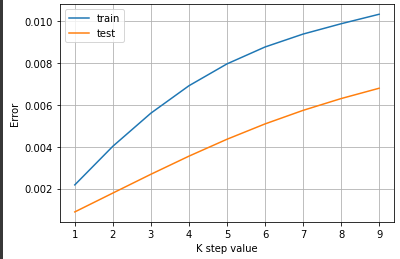

<img src="image/kstep_unidimension_main.png" >

[[-0.156058]
 [-0.071057]
 [ 0.00456 ]
 [ 0.072342]
 [ 0.133683]] [-0.071057  0.00456   0.072342  0.133683  0.189835]
W input shape  (300, 2)
W_reservoir shape  (300, 300)
dataset shape  (16383, 1)
output Y shape  1
(1, 301)
at  0  step corresponding value of y_hat [[-6.07514935]]  and actual value of y -0.071057
at  5000  step corresponding value of y_hat [[-13.83682952]]  and actual value of y -13.873947
at  10000  step corresponding value of y_hat [[4.29603972]]  and actual value of y 4.305944
train loss 0.0016403102741359026  test loss 0.0008245801607595113 
=============done===============
K value for steps 1 iteration Train: 	 mean: 	 0.0016403102741359026
k value for steps 1 iteration Test:  	 mean: 	 0.0008245801607595113
[[-0.156058]
 [-0.071057]
 [ 0.00456 ]
 [ 0.072342]
 [ 0.133683]] [0.00456  0.072342 0.133683 0.189835 0.241921]
W input shape  (300, 2)
W_reservoir shape  (300, 300)
dataset shape  (16381, 1)
output Y shape  1
(1, 301)
at  0  step corresponding value of y_hat

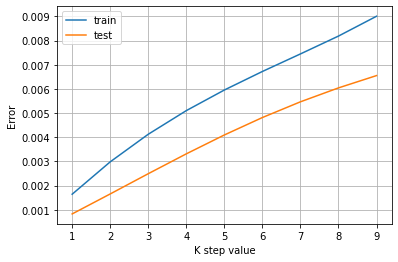

In [26]:
n_features=1
X,y= prepare_data(list_lorentz, n_features) 


trainLen=14000

testLen=2000

# generate ESN reservoir
inputSize = 1
outputSize = 1
resSize=300
#resSize = 2700


reg = 1e-2
spec=1
scale=0.46


geneval = list()
yt=0
trainmean = list()
testmean = list()
avgoutmean = list()
tries=[1,2,3,4,5,6,7,8,9]
for times in tries:
      #K step
    X_train=[]
    y_train=[]
    k=times
    for i in range((k-1),len(X)-(k-1)):
        X_train.append(X[i-(k-1)])
        y_train.append(y[i])

    X_train,y_train=np.array(X_train),np.array(y_train)
    print(X_train[0:5,:],y_train[0:5])
    n1, n2, yt,xsk = train_ESN(X_train, y_train,trainLen, testLen, inputSize, outputSize, resSize, reg, spec, scale)
    #avg, n1, n2,yt,NEW_y = trainESN(X, y, initLen, trainLen, testLen, inSize, outSize, resSize, a, reg, spec, scale)
    traineval=(n1)
    testeval=(n2)
    trainmean.append(traineval)
    testmean.append(testeval)
    #geneval.append(n3)
    print("K value for steps",times,"iteration Train: \t mean: \t", n1 )
    print("k value for steps",times,"iteration Test:  \t mean: \t", n2 )
#print("Gen:  \t mean: \t", mean(geneval), "\t std: \t", std(geneval))
    #print("AVG:  \t mean: \t", mean(avg), "\t std: \t", std(avg))
plt.plot(tries, trainmean)
plt.plot(tries, testmean)
plt.grid()
plt.xlabel("K step value")
plt.ylabel("Error")
plt.legend(['train', 'test'])
plt.show()


# Checking with multidimensional input (where input dimension is k and time step k ) and k step forecasting


## Increasing value of time step k but and increasing input dimension with k

## we can observe that while increasing steps we also increased dimension and it leads to better performance upto k=3 and input dimension =3 

<img src="image/k_step_multi.png" >

sample x with 1 dimension and y such as  [[-0.156058]] [-0.071057]
W input shape  (1600, 2)
W_reservoir shape  (1600, 1600)
dataset shape  (16383, 1)
output Y shape  1
(1, 1601)
at  0  step corresponding value of y_hat [[-6.89990829]]  and actual value of y -0.071057
at  5000  step corresponding value of y_hat [[-13.83625586]]  and actual value of y -13.873947
at  10000  step corresponding value of y_hat [[4.30200677]]  and actual value of y 4.305944
train loss 0.001742016096486292  test loss 0.0006639035582540383 
=============done===============
K value for steps 1 iteration Train: 	 mean: 	 0.001742016096486292
k value for steps 1 iteration Test:  	 mean: 	 0.0006639035582540383


C:\Users\acer\AppData\Local\Temp/ipykernel_12124/1902551746.py:55: ComplexWarning: Casting complex values to real discards the imaginary part
  projection=projection.astype(float)
C:\Users\acer\AppData\Local\Temp/ipykernel_12124/1666429816.py:35: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


(16002, 3)
Shape of X: (16002, 1600)
Shape of transformed X: (16002, 3)


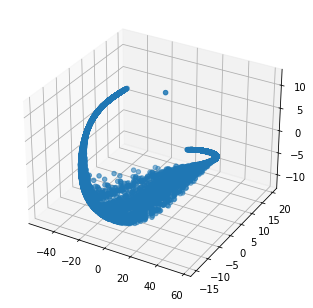

sample x with 2 dimension and y such as  [[-0.156058 -0.071057]] [0.00456]
W input shape  (1600, 3)
W_reservoir shape  (1600, 1600)
dataset shape  (16382, 2)
output Y shape  1
(1, 1601)
at  0  step corresponding value of y_hat [[0.2482485]]  and actual value of y 0.00456
at  5000  step corresponding value of y_hat [[-14.24208235]]  and actual value of y -14.238812
at  10000  step corresponding value of y_hat [[4.74445619]]  and actual value of y 4.746838
train loss 9.06900503718414e-05  test loss 4.0202649866554e-05 
=============done===============
K value for steps 2 iteration Train: 	 mean: 	 9.06900503718414e-05
k value for steps 2 iteration Test:  	 mean: 	 4.0202649866554e-05
(16002, 3)
Shape of X: (16002, 1600)
Shape of transformed X: (16002, 3)


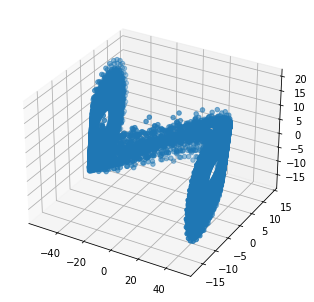

sample x with 3 dimension and y such as  [[-0.156058 -0.071057  0.00456 ]] [0.072342]
W input shape  (1600, 4)
W_reservoir shape  (1600, 1600)
dataset shape  (16381, 3)
output Y shape  1
(1, 1601)
at  0  step corresponding value of y_hat [[0.09811798]]  and actual value of y 0.072342
at  5000  step corresponding value of y_hat [[-14.51206295]]  and actual value of y -14.508641
at  10000  step corresponding value of y_hat [[5.23169641]]  and actual value of y 5.231333
train loss 5.597719531881061e-05  test loss 3.417458331313281e-05 
=============done===============
K value for steps 3 iteration Train: 	 mean: 	 5.597719531881061e-05
k value for steps 3 iteration Test:  	 mean: 	 3.417458331313281e-05
(16002, 3)
Shape of X: (16002, 1600)
Shape of transformed X: (16002, 3)


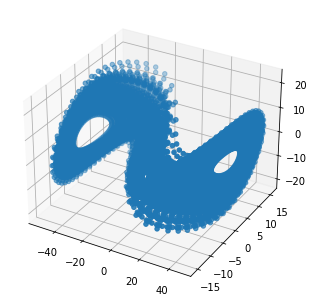

sample x with 4 dimension and y such as  [[-0.156058 -0.071057  0.00456   0.072342]] [0.133683]
W input shape  (1600, 5)
W_reservoir shape  (1600, 1600)
dataset shape  (16380, 4)
output Y shape  1
(1, 1601)
at  0  step corresponding value of y_hat [[-1.55023424]]  and actual value of y 0.133683
at  5000  step corresponding value of y_hat [[-14.67251335]]  and actual value of y -14.67036
at  10000  step corresponding value of y_hat [[5.76334672]]  and actual value of y 5.762528
train loss 0.00039204226434415496  test loss 3.3685873775790587e-05 
=============done===============
K value for steps 4 iteration Train: 	 mean: 	 0.00039204226434415496
k value for steps 4 iteration Test:  	 mean: 	 3.3685873775790587e-05
(16002, 3)
Shape of X: (16002, 1600)
Shape of transformed X: (16002, 3)


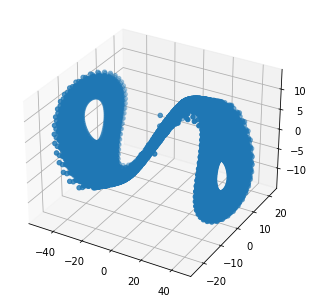

sample x with 5 dimension and y such as  [[-0.156058 -0.071057  0.00456   0.072342  0.133683]] [0.189835]
W input shape  (1600, 6)
W_reservoir shape  (1600, 1600)
dataset shape  (16379, 5)
output Y shape  1
(1, 1601)
at  0  step corresponding value of y_hat [[-1.37625422]]  and actual value of y 0.189835
at  5000  step corresponding value of y_hat [[-14.71486064]]  and actual value of y -14.714015
at  10000  step corresponding value of y_hat [[6.34192893]]  and actual value of y 6.343262
train loss 0.00036152958884801215  test loss 2.6395430678729734e-05 
=============done===============
K value for steps 5 iteration Train: 	 mean: 	 0.00036152958884801215
k value for steps 5 iteration Test:  	 mean: 	 2.6395430678729734e-05
(16002, 3)
Shape of X: (16002, 1600)
Shape of transformed X: (16002, 3)


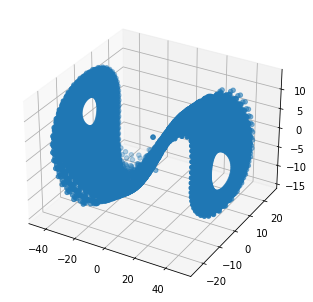

sample x with 6 dimension and y such as  [[-0.156058 -0.071057  0.00456   0.072342  0.133683  0.189835]] [0.241921]
W input shape  (1600, 7)
W_reservoir shape  (1600, 1600)
dataset shape  (16378, 6)
output Y shape  1
(1, 1601)
at  0  step corresponding value of y_hat [[-0.28428112]]  and actual value of y 0.241921
at  5000  step corresponding value of y_hat [[-14.63314593]]  and actual value of y -14.633702
at  10000  step corresponding value of y_hat [[6.97497545]]  and actual value of y 6.975881
train loss 0.00013028849483224603  test loss 2.8512607799946035e-05 
=============done===============
K value for steps 6 iteration Train: 	 mean: 	 0.00013028849483224603
k value for steps 6 iteration Test:  	 mean: 	 2.8512607799946035e-05
(16002, 3)
Shape of X: (16002, 1600)
Shape of transformed X: (16002, 3)


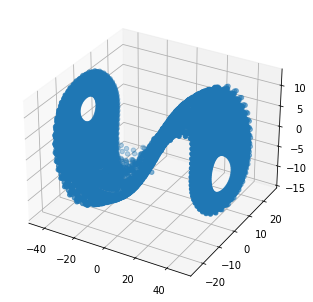

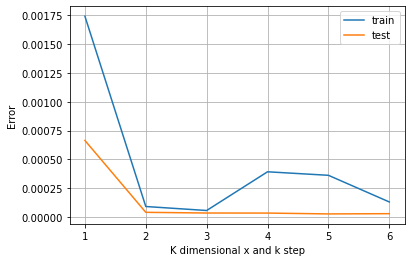

In [27]:

trainLen=14000

testLen=2000

# generate ESN reservoir
inputSize = 1
outputSize = 1
resSize=1600



reg = 1e-2
spec=1
scale=0.46


geneval = list()
yt=0
trainmean = list()
testmean = list()
avgoutmean = list()
tries=[1,2,3,4,5,6]
for times in tries:
      #K step
    n_features=times
    X_multi,y_uni= prepare_data(list_lorentz, n_features) 
    inputSize = times
    outputSize = 1
    print("sample x with",times,"dimension and y such as ",X_multi[0:1,:],y_uni[0:1])
    m1, m2, yt_uni,xs_multi = train_ESN(X_multi, y_uni,trainLen, testLen, inputSize, outputSize, resSize, reg, spec, scale)
    #avg, n1, n2,yt,NEW_y = trainESN(X, y, initLen, trainLen, testLen, inSize, outSize, resSize, a, reg, spec, scale)
    trainmean.append(m1)
    testmean.append(m2)
    #geneval.append(n3)
    print("K value for steps",times,"iteration Train: \t mean: \t", m1 )
    print("k value for steps",times,"iteration Test:  \t mean: \t", m2 )
    pca_dim=3
    my_PCA_visualize(xs_multi,pca_dim)
#print("Gen:  \t mean: \t", mean(geneval), "\t std: \t", std(geneval))
    #print("AVG:  \t mean: \t", mean(avg), "\t std: \t", std(avg))
plt.plot(tries, trainmean)
plt.plot(tries, testmean)
plt.grid()
plt.xlabel("K dimensional x and k step")
plt.ylabel("Error")
plt.legend(['train', 'test'])
plt.show()


Here 1 means input [1] output [2] => [[-0.156058]] [-0.071057]

Here 2 means input [1,2] output [3] =>  [[-0.156058 -0.071057]] [0.00456]

Here 3 means input [1,2,3] output [4] =>  [[-0.156058 -0.071057  0.00456 ]] [0.072342]

Here 4 means input [1,2,3,4] output [5] =>  [[-0.156058 -0.071057  0.00456   0.072342]] [0.133683]

Here 5 means input [1,2,3,4,5 ] output [6] =>  [[-0.156058 -0.071057  0.00456   0.072342  0.133683]] [0.189835]
...
## Image serial
# dimension and k value: 6,5 ,4,3, 2,1   



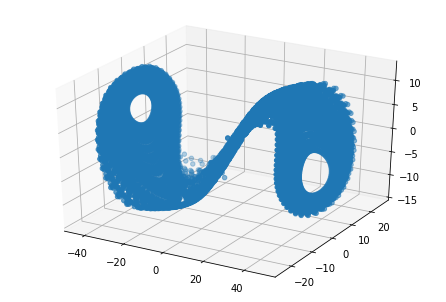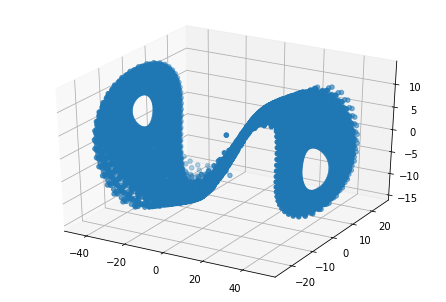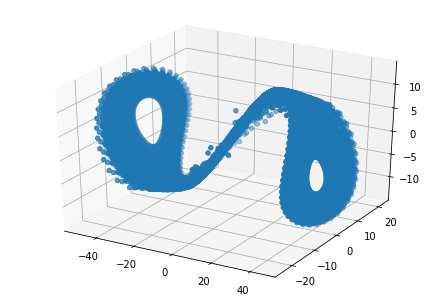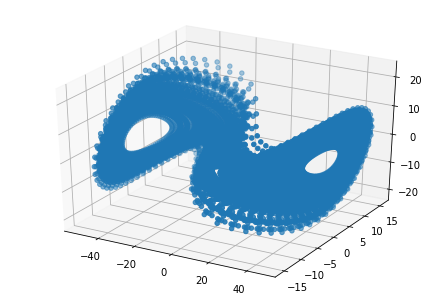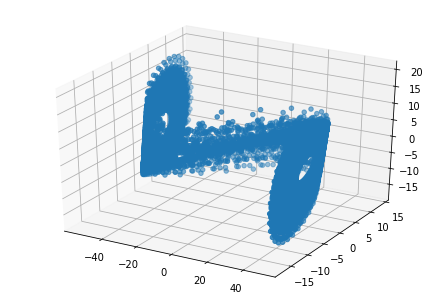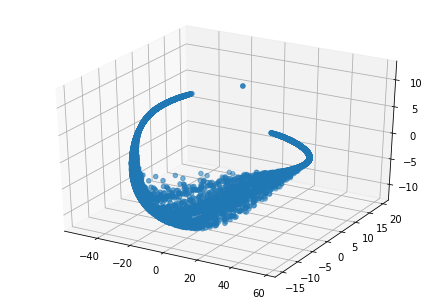

# **Part1 :(b) 2Sine**

2sine data


In [28]:
n_steps=3
#lista=np.arange(20000)
X2, y2 = prepare_data(list_sine, n_steps)
X2.shape

(1997, 3)

# Did same coding for hyperparameter tuing for 2sine and the images are listed below

# Scale : 0.45 Best loss

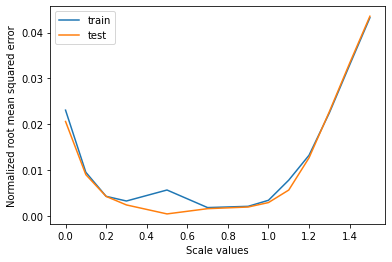

# State : 750 Best loss

## input dimension:3

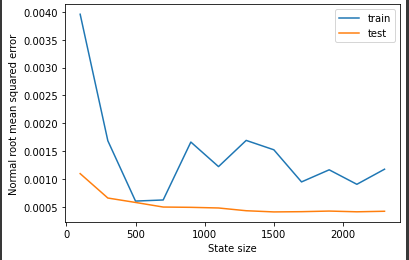

## input dimension:1

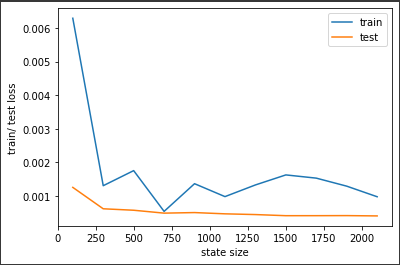

# Regularization parameter lambda : 10^-5 Best loss

### input dimension : 3

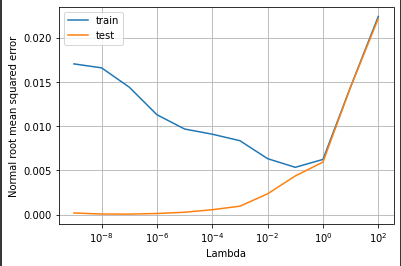

### input dimension : 1

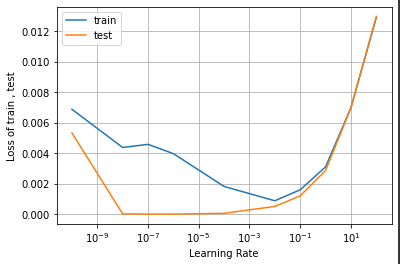

# spectral radius : 1 Best loss

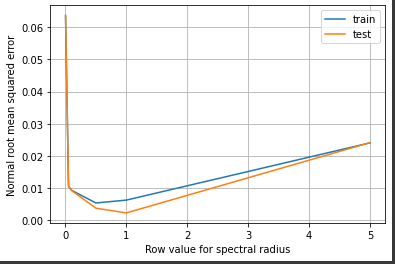


### With input dimension 1

## *   Train: 	 mean: 	 0.006642918982583188
## *   Test:  	 mean: 	 0.004420882840609075


### With input dimension 3


## * Train: 	 mean: 	 0.001230219056982542
## * Test:  	 mean: 	 0.0008639525491841363

In [29]:
n_steps=3
inputSize = 3
#lista=np.arange(20000)
X2, y2 = prepare_data(list_sine, n_steps)
print(X2.shape)



trainLen_sine = 1000

testLen_sine = 800

# generate ESN reservoir


outputSize = 1
resSize = 750
#resSize = 300


reg = 1e-5  # regularization coefficient
#reg = 100  # regularization coefficient
spec=0.46
scale=1


yt=0

n1, n2,yt2,xs_sine = train_ESN(X2, y2, trainLen_sine, testLen_sine, inputSize, outputSize, resSize, reg, spec, scale)
traineval=(n1)
testeval=(n2)
    #geneval.append(n3)
print("Train: \t mean: \t", (traineval))
print("Test:  \t mean: \t", (testeval))


(1997, 3)
W input shape  (750, 4)
W_reservoir shape  (750, 750)
dataset shape  (1997, 3)
output Y shape  1
(1, 751)
at  0  step corresponding value of y_hat [[1.4697638]]  and actual value of y 1.3613296875276064
train loss 0.0012302135663082852  test loss 0.000863947057310976 
=============done===============
Train: 	 mean: 	 0.0012302135663082852
Test:  	 mean: 	 0.000863947057310976


### PLOT  ACTUAL Y UPTO 1000 (GREEN) AND Y_HAT UPTO 1800 STEPS (RED)

(1, 1800)


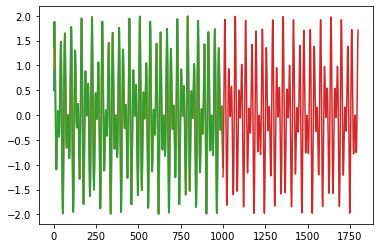

In [30]:
import matplotlib.pyplot as plt
print(yt2.shape)

day_new=np.arange(1,1000)
day_pred=np.arange(1000,1800)

plt.plot(day_new,X2[1:1000])
plt.plot(day_pred,np.squeeze(yt2[:,1000:1800]))

### plot y_hat (y predicted)

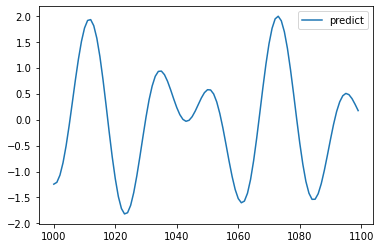

In [31]:
day_pred2=np.arange(1000,1100)
plt.plot(day_pred2,np.squeeze(yt2[:,1000:1100]))
plt.legend(['predict'])

# plot actual y (dotted blue) and predicted y_hat (orange) : almost perfect

(1, 1800)


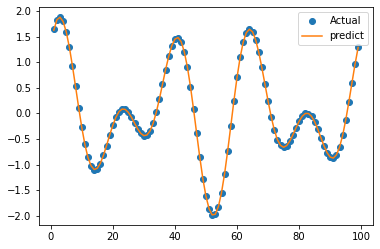

In [32]:
import matplotlib.pyplot as plt
print(yt2.shape)

day_pred2=np.arange(1,100)

plt.plot(day_pred2,y2[1:100],'o')
plt.plot(day_pred2,np.squeeze(yt2[:,1:100]))
plt.legend(['Actual', 'predict'])

## print actual y (y2) and predicted y_hat (yt2)

In [33]:
print(y2[trainLen_sine:trainLen_sine+10])
#for k step

print(yt2[:,trainLen_sine:trainLen_sine+10])

[-1.24000277 -1.20183975 -1.06324487 -0.82648708 -0.50311537 -0.11329592
  0.31568987  0.75165934  1.16025853  1.50796021]
[[-1.24330401 -1.20797369 -1.07025266 -0.83212892 -0.50630282 -0.11410962
   0.31642263  0.75233568  1.15866578  1.50605327]]


### they look almost same 
#### actual y
[-1.24000277 -1.20183975 -1.06324487 -0.82648708 -0.50311537 -0.11329592
  0.31568987  0.75165934  1.16025853  1.50796021]<br>
#### predicted y_hat
[[-1.2433052  -1.20797493 -1.07025392 -0.83213015 -0.50630394 -0.11411048
   0.31642228  0.75233593  1.15866657  1.50605443]]

#### plot some dimensions of state space

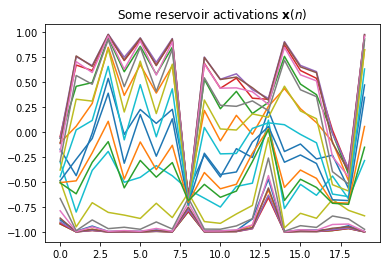

In [34]:



#print(X[4890:5000])
# print(np.squeeze(NEW_y[:,0:10]))
figure(2).clear()
plot( xs_sine[2:25,0:20].T )
title('Some reservoir activations $\mathbf{x}(n)$')
show()

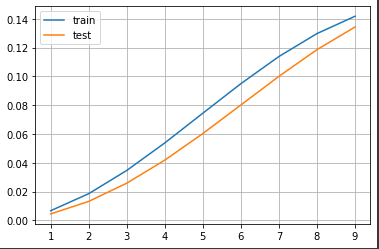

### increasing k value but keeping input dimension 1 train and test loss increases with time
# unidimensional input and K step for 2sine

## Increasing step value k but keeping input dimension 1 



*   K value for steps 1 iteration Train: 	 mean: 	 0.006642918982583188 iteration Test:  	 mean: 	 0.004420882840609075
*   K value for steps 2 iteration Train: 	 mean: 	 0.01848814636655743 iteration Test:  	 mean: 	 0.013127751082808888
* K value for steps 3 iteration Train: 	 mean: 	 0.0346337483132071 iteration Test:  	 mean: 	 0.025794486500568644
* K value for steps 4 iteration Train: 	 mean: 	 0.05378969346201982 iteration Test:  	 mean: 	 0.041808726333717676
* K value for steps 5 iteration Train: 	 mean: 	 0.07443473626068792 iteration Test:  	 mean: 	 0.060298698803960306
* K value for steps 6 iteration Train: 	 mean: 	 0.0949643271036767 iteration Test:  	 mean: 	 0.08015238097607921
*  K value for steps 7 iteration Train: 	 mean: 	 0.11384588958753762 iteration Test:  	 mean: 	 0.10006306600005745
* K value for steps 8 iteration Train: 	 mean: 	 0.12977448656977486 iteration Test:  	 mean: 	 0.11860787330358342
* K value for steps 9 iteration Train: 	 mean: 	 0.1418203997424244 iteration Test:  	 mean: 	 0.13435954678184592



[[-0.00401512]
 [ 0.49966622]
 [ 0.96614114]
 [ 1.36132969]
 [ 1.65712253]] [0.49966622 0.96614114 1.36132969 1.65712253 1.83368692]
W input shape  (750, 2)
W_reservoir shape  (750, 750)
dataset shape  (1999, 1)
output Y shape  1
(1, 751)
at  0  step corresponding value of y_hat [[1.09483461]]  and actual value of y 0.499666220705854
train loss 0.006642918691622094  test loss 0.004420883552440745 
=============done===============
K value for steps 1 iteration Train: 	 mean: 	 0.006642918691622094 iteration Test:  	 mean: 	 0.004420883552440745
[[-0.00401512]
 [ 0.49966622]
 [ 0.96614114]
 [ 1.36132969]
 [ 1.65712253]] [0.96614114 1.36132969 1.65712253 1.83368692 1.8810288 ]
W input shape  (750, 2)
W_reservoir shape  (750, 750)
dataset shape  (1997, 1)
output Y shape  1
(1, 751)
at  0  step corresponding value of y_hat [[2.5289858]]  and actual value of y 0.9661411425704844
train loss 0.01848814486596751  test loss 0.01312775126124301 
=============done===============
K value for steps 

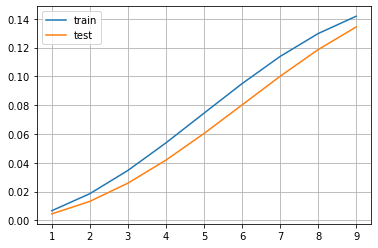

In [35]:
n_steps=1
#lista=np.arange(20000)
X, y = prepare_data(list_sine, n_steps)

##########################

initLen = 0
trainLen = 1000

testLen = 800

# generate ESN reservoir
inSize = 3
inSize = 1
outSize = 1

resSize = 750


reg = 1e-5  # regularization coefficient
#reg = 100  # regularization coefficient
spec=0.46
scale=1


geneval = list()
yt=0
trainmean = list()
testmean = list()
avgoutmean = list()
tries=[1,2,3,4,5,6,7,8,9]
for times in range(1,10):
      #K step
    X_train=[]
    y_train=[]
    k=times
    for i in range((k-1),len(X)-(k-1)):
        X_train.append(X[i-(k-1)])
        y_train.append(y[i])

    X_train,y_train=np.array(X_train),np.array(y_train)
    print(X_train[0:5,:],y_train[0:5])
    n1, n2, yt2,xsk = train_ESN(X_train, y_train, trainLen, testLen, inSize, outSize, resSize, reg, spec, scale)
    #avg, n1, n2,yt,NEW_y = trainESN(X, y, initLen, trainLen, testLen, inSize, outSize, resSize, a, reg, spec, scale)
    traineval=(n1)
    testeval=(n2)
    trainmean.append(traineval)
    testmean.append(testeval)
    #geneval.append(n3)
    print("K value for steps",times,"iteration Train: \t mean: \t", n1,"iteration Test:  \t mean: \t",n2 )
    #print("k value for steps",times,"iteration Test:  \t mean: \t", n2 )
#print("Gen:  \t mean: \t", mean(geneval), "\t std: \t", std(geneval))
    #print("AVG:  \t mean: \t", mean(avg), "\t std: \t", std(avg))
plt.plot(tries, trainmean)
plt.plot(tries, testmean)
plt.grid()
plt.legend(['train', 'test'])
plt.show()

# k step multidimensional input for 2sine and State space plot
## increasing k steps with k dimensional input space

### increasing k value and keeping input dimension also k, train and test loss decreases untill k-4 and k=3 yields good tradeoff between loss and k value

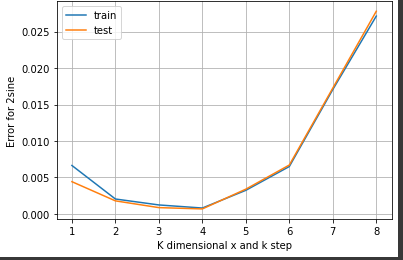

sample x with 1 dimension and y such as  [[-0.00401512]] [0.49966622]
W input shape  (750, 2)
W_reservoir shape  (750, 750)
dataset shape  (1999, 1)
output Y shape  1
(1, 751)
at  0  step corresponding value of y_hat [[1.09483461]]  and actual value of y 0.499666220705854
train loss 0.006642918691622094  test loss 0.004420883552440745 
=============done===============
K value for steps 1 iteration Train: 	 mean: 	 0.006642918691622094
k value for steps 1 iteration Test:  	 mean: 	 0.004420883552440745


C:\Users\acer\AppData\Local\Temp/ipykernel_12124/1902551746.py:55: ComplexWarning: Casting complex values to real discards the imaginary part
  projection=projection.astype(float)
C:\Users\acer\AppData\Local\Temp/ipykernel_12124/1666429816.py:35: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


(1802, 3)
Shape of X: (16002, 1600)
Shape of transformed X: (1802, 3)


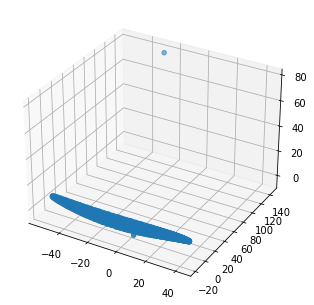

sample x with 2 dimension and y such as  [[-0.00401512  0.49966622]] [0.96614114]
W input shape  (750, 3)
W_reservoir shape  (750, 750)
dataset shape  (1998, 2)
output Y shape  1
(1, 751)
at  0  step corresponding value of y_hat [[1.01573436]]  and actual value of y 0.9661411425704844
train loss 0.0020456206224575804  test loss 0.0017905775311869022 
=============done===============
K value for steps 2 iteration Train: 	 mean: 	 0.0020456206224575804
k value for steps 2 iteration Test:  	 mean: 	 0.0017905775311869022
(1802, 3)
Shape of X: (16002, 1600)
Shape of transformed X: (1802, 3)


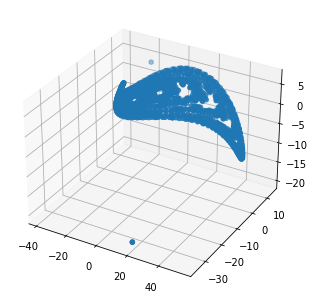

sample x with 3 dimension and y such as  [[-0.00401512  0.49966622  0.96614114]] [1.36132969]
W input shape  (750, 4)
W_reservoir shape  (750, 750)
dataset shape  (1997, 3)
output Y shape  1
(1, 751)
at  0  step corresponding value of y_hat [[1.4697638]]  and actual value of y 1.3613296875276064
train loss 0.0012302135663082852  test loss 0.000863947057310976 
=============done===============
K value for steps 3 iteration Train: 	 mean: 	 0.0012302135663082852
k value for steps 3 iteration Test:  	 mean: 	 0.000863947057310976
(1802, 3)
Shape of X: (16002, 1600)
Shape of transformed X: (1802, 3)


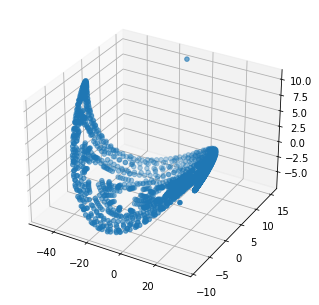

sample x with 4 dimension and y such as  [[-0.00401512  0.49966622  0.96614114  1.36132969]] [1.65712253]
W input shape  (750, 5)
W_reservoir shape  (750, 750)
dataset shape  (1996, 4)
output Y shape  1
(1, 751)
at  0  step corresponding value of y_hat [[1.71010059]]  and actual value of y 1.6571225254988875
train loss 0.0008075792331192145  test loss 0.0006861942070447616 
=============done===============
K value for steps 4 iteration Train: 	 mean: 	 0.0008075792331192145
k value for steps 4 iteration Test:  	 mean: 	 0.0006861942070447616
(1802, 3)
Shape of X: (16002, 1600)
Shape of transformed X: (1802, 3)


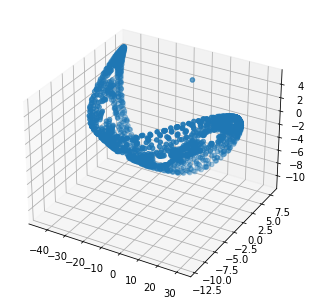

sample x with 5 dimension and y such as  [[-0.00401512  0.49966622  0.96614114  1.36132969  1.65712253]] [1.83368692]
W input shape  (750, 6)
W_reservoir shape  (750, 750)
dataset shape  (1995, 5)
output Y shape  1
(1, 751)
at  0  step corresponding value of y_hat [[1.84176496]]  and actual value of y 1.8336869153928887
train loss 0.0032389639756635743  test loss 0.0033970183939503787 
=============done===============
K value for steps 5 iteration Train: 	 mean: 	 0.0032389639756635743
k value for steps 5 iteration Test:  	 mean: 	 0.0033970183939503787
(1802, 3)
Shape of X: (16002, 1600)
Shape of transformed X: (1802, 3)


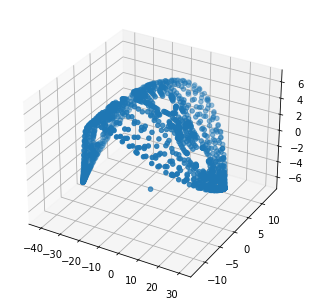

sample x with 6 dimension and y such as  [[-0.00401512  0.49966622  0.96614114  1.36132969  1.65712253  1.83368692]] [1.8810288]
W input shape  (750, 7)
W_reservoir shape  (750, 750)
dataset shape  (1994, 6)
output Y shape  1
(1, 751)
at  0  step corresponding value of y_hat [[2.01506731]]  and actual value of y 1.881028802829088
train loss 0.006500533681439272  test loss 0.006705956154452881 
=============done===============
K value for steps 6 iteration Train: 	 mean: 	 0.006500533681439272
k value for steps 6 iteration Test:  	 mean: 	 0.006705956154452881
(1802, 3)
Shape of X: (16002, 1600)
Shape of transformed X: (1802, 3)


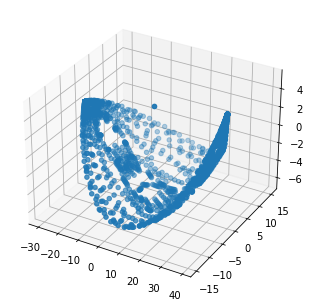

sample x with 7 dimension and y such as  [[-0.00401512  0.49966622  0.96614114  1.36132969  1.65712253  1.83368692
   1.8810288 ]] [1.79967476]
W input shape  (750, 8)
W_reservoir shape  (750, 750)
dataset shape  (1993, 7)
output Y shape  1
(1, 751)
at  0  step corresponding value of y_hat [[1.22831921]]  and actual value of y 1.7996747648372355
train loss 0.0170613434950921  test loss 0.01725601541835937 
=============done===============
K value for steps 7 iteration Train: 	 mean: 	 0.0170613434950921
k value for steps 7 iteration Test:  	 mean: 	 0.01725601541835937
(1802, 3)
Shape of X: (16002, 1600)
Shape of transformed X: (1802, 3)


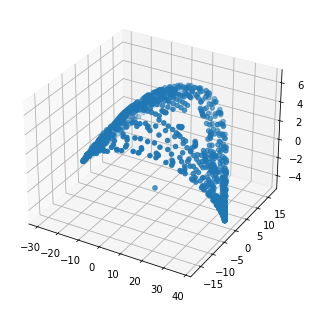

sample x with 8 dimension and y such as  [[-0.00401512  0.49966622  0.96614114  1.36132969  1.65712253  1.83368692
   1.8810288   1.79967476]] [1.60041941]
W input shape  (750, 9)
W_reservoir shape  (750, 750)
dataset shape  (1992, 8)
output Y shape  1
(1, 751)
at  0  step corresponding value of y_hat [[0.8391686]]  and actual value of y 1.6004194131698006
train loss 0.0271280004731239  test loss 0.027794774933924567 
=============done===============
K value for steps 8 iteration Train: 	 mean: 	 0.0271280004731239
k value for steps 8 iteration Test:  	 mean: 	 0.027794774933924567
(1802, 3)
Shape of X: (16002, 1600)
Shape of transformed X: (1802, 3)


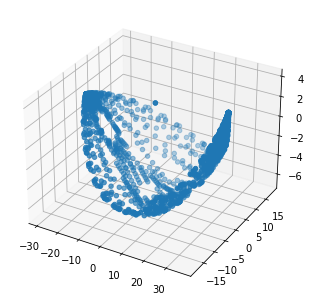

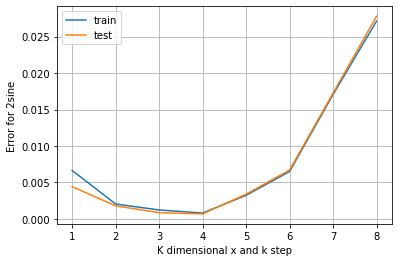

In [36]:

# n_steps=1
# #lista=np.arange(20000)
# X, y = prepare_data(list_sine, n_steps)

##########################

trainLen = 1000

testLen = 800

# generate ESN reservoir
inputSize = 3
inSize = 3
outputSize = 1
resSize = 750
#resSize = 300


reg = 1e-5  # regularization coefficient
#reg = 100  # regularization coefficient
spec=0.46
scale=1


geneval = list()
yt=0
trainmean = list()
testmean = list()
avgoutmean = list()
tries_sine=[1,2,3,4,5,6,7,8]
for times in tries_sine:
      #K step
    n_features=times
    X_multi,y_uni= prepare_data(list_sine, n_features) 
    inputSize = times
    outputSize = 1
    print("sample x with",times,"dimension and y such as ",X_multi[0:1,:],y_uni[0:1])
    m1_sine, m2_sine, yt_uni,xs_multi_sine = train_ESN(X_multi, y_uni,trainLen, testLen, inputSize, outputSize, resSize, reg, spec, scale)
    #avg, n1, n2,yt,NEW_y = trainESN(X, y, initLen, trainLen, testLen, inSize, outSize, resSize, a, reg, spec, scale)
    trainmean.append(m1_sine)
    testmean.append(m2_sine)
    #geneval.append(n3)
    print("K value for steps",times,"iteration Train: \t mean: \t", m1_sine )
    print("k value for steps",times,"iteration Test:  \t mean: \t", m2_sine )
    my_PCA_visualize(xs_multi_sine,3)
#print("Gen:  \t mean: \t", mean(geneval), "\t std: \t", std(geneval))
    #print("AVG:  \t mean: \t", mean(avg), "\t std: \t", std(avg))
plt.plot(tries_sine, trainmean)
plt.plot(tries_sine, testmean)
plt.grid()
plt.xlabel("K dimensional x and k step")
plt.ylabel("Error for 2sine")
plt.legend(['train', 'test'])
plt.show()

# Sequence:8,7,6,5,4,3,2,1 dimensional and step input **2sine state space plot**

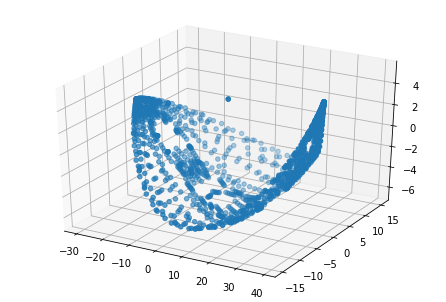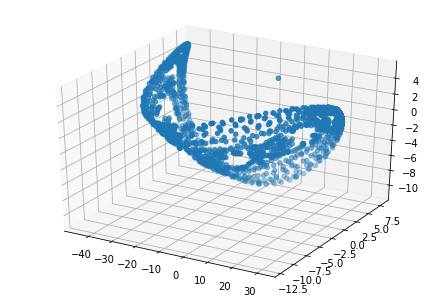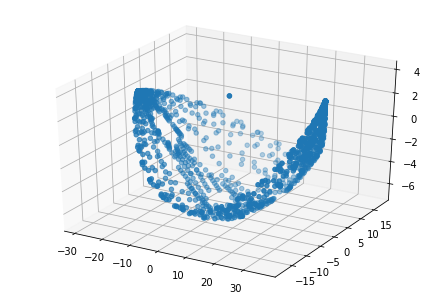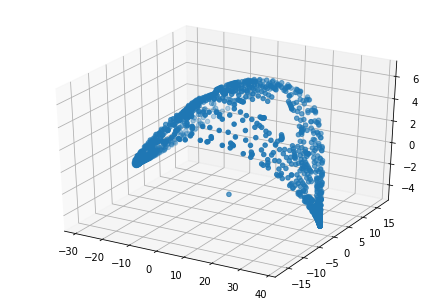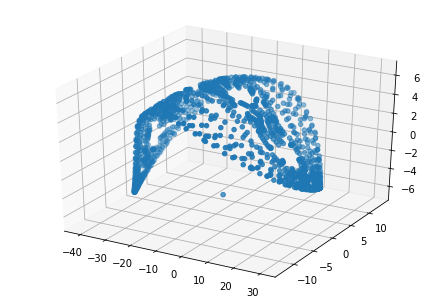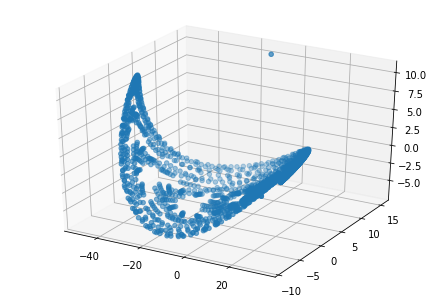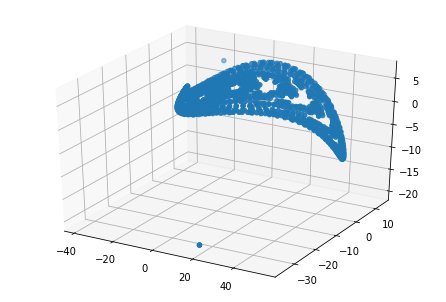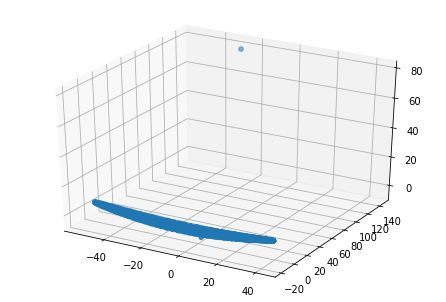

# Extra : visualization for lorentz using MDS,LLE, IsoMap, tsne

## slight changes in hyperparameter changes state space shape

[0.90966892 0.03799373 0.03317778]
[4826.01651278  986.28655243  921.66010311]
(16002, 3)


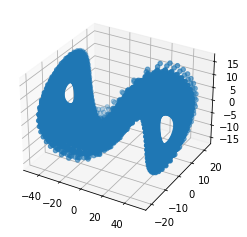

In [37]:

import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler as sc

pca = PCA(n_components=3)
lorentz_best_state_scaled = sc().fit_transform(lorentz_best_state)
projected=pca.fit_transform(lorentz_best_state_scaled)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)
print(projected.shape)

fig = plt.figure()
ax = plt.axes(projection='3d')
#use rank of PCA (most important to less imp - highest variation to lowest)


# Data for a three-dimensional line
xline = projected[:, 0]
zline =  projected[:, 1]
#2
yline =  projected[:, 2]
#1
#ax.plot3D(xline, yline, zline, 'gray')

ax.scatter3D(xline, yline, zline, cmap='Greens')


# MDS


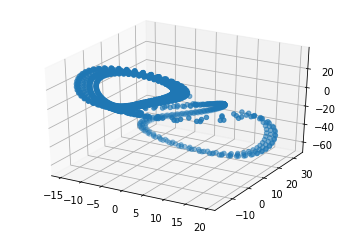

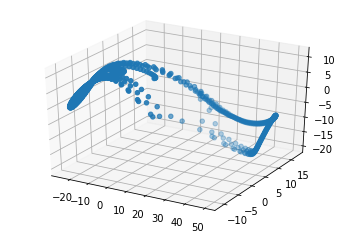

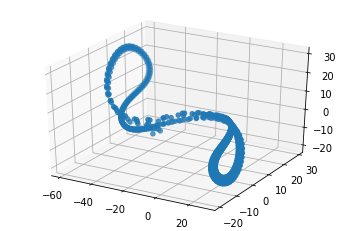

In [38]:
from sklearn.manifold import MDS
embedding = MDS(n_components=3)
X_transformed_mds = embedding.fit_transform(lorentz_best_state_scaled[0:1000])
X_transformed_mds.shape

(1000, 3)

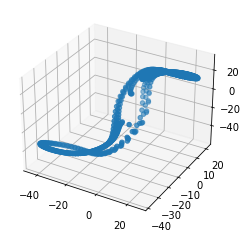

In [39]:
fig = plt.figure()
ax = plt.axes(projection='3d')


# Data for a three-dimensional line
xline = X_transformed_mds[:, 0]
yline =  X_transformed_mds[:, 1]
zline =  X_transformed_mds[:, 2]
#ax.plot3D(xline, yline, zline, 'gray')

ax.scatter3D(xline, yline, zline, cmap='Greens')

# TSNE

## included the images for TSNE

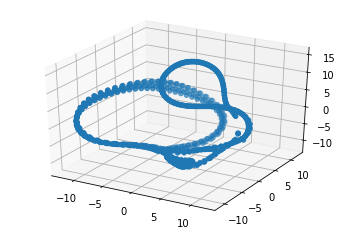


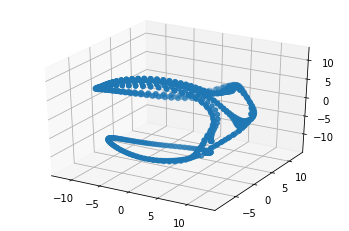

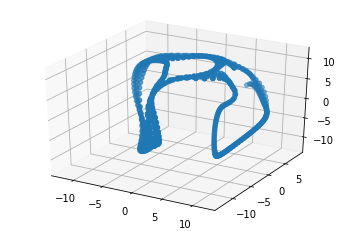

# LLE

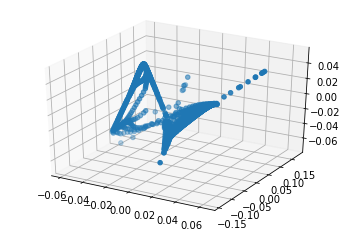

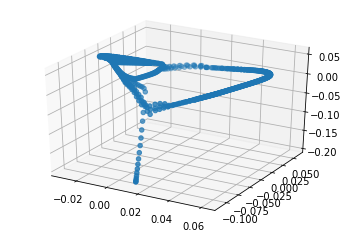

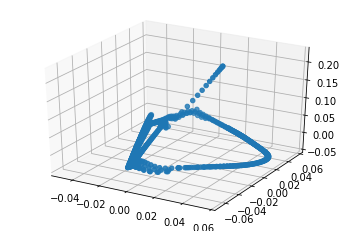

In [40]:
from sklearn.manifold import LocallyLinearEmbedding
embedding = LocallyLinearEmbedding(n_components=3)
X_transformed = embedding.fit_transform(lorentz_best_state_scaled[:1000])
X_transformed.shape

(1000, 3)

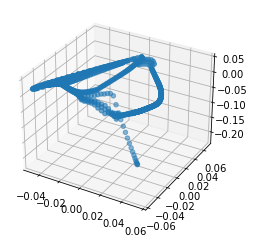

In [41]:
fig = plt.figure()
ax = plt.axes(projection='3d')


# Data for a three-dimensional line
xline = X_transformed[:, 0]
yline =  X_transformed[:, 1]
zline =  X_transformed[:, 2]
#ax.plot3D(xline, yline, zline, 'gray')

ax.scatter3D(xline, yline, zline, cmap='Greens')

# isomap

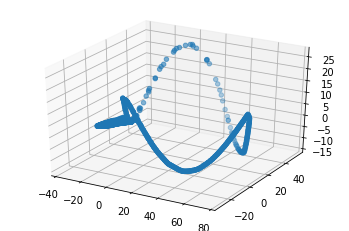

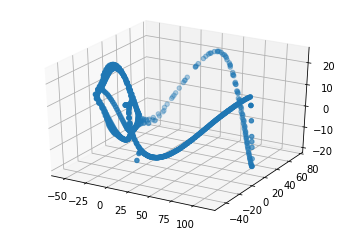

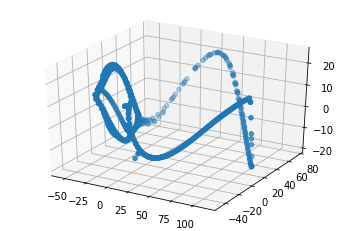

In [42]:

from sklearn.manifold import Isomap


embedding = Isomap(n_components=3)
X_transformed_iso = embedding.fit_transform(lorentz_best_state_scaled[:1000])
X_transformed.shape


(1000, 3)

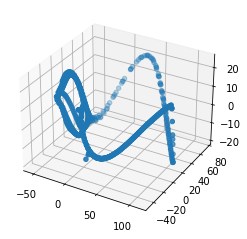

In [43]:
fig = plt.figure()
ax = plt.axes(projection='3d')


# Data for a three-dimensional line
xline = X_transformed_iso[:, 0]
yline =  X_transformed_iso[:, 1]
zline =  X_transformed_iso[:, 2]
#ax.plot3D(xline, yline, zline, 'gray')

ax.scatter3D(xline, yline, zline, cmap='Greens')

# According to the analysis, I can observe that <br>
## 1. ESN are sensitive to hyperparameters and careful initialization 
## 2. They can learn interesting dynamics 
## 3. Learned state space can reflect the actual dynamics 
## 4. Efficient as they are faster than RNN,LSTM and GRU (dont require gradient descent , can be solved using closed equation for least square problem solution)
## 5. They get rid of the exploding and vanishing gradient problem but this senstive learning mechanism lacks interpretability 